# Первичная предобработка данных: RISK PREDICT

In [2]:
# Загрузка датасета
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Этап 1: Первичный анализ датасета

In [3]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/Хакатоны/CUP_IT_25/data_old.csv'
data = pd.read_csv(file_path, delimiter=';')
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0xE3A4BED668151E271B6680FE5E8772D6,0xFDD38318ED6FC6EC68131DB6671F100C,2022-01-01 12:07:00.0000000,1925,0xD2B5A46F0FFF14D5209ED49B6215BDA0,0xCDEA5658E0AD52E1700653CAE2A4928D,0x95758EBA87326C4D5DECC8B51A8B9C61,0
1,0xD1DD45B19A9195143BE217BD83702901,0x9F7486A2D5FEFFF7453777B1D0592E16,2022-01-01 12:17:00.0000000,4800,0x0A1FF218569A9829DDA53CBDF9FD12F9,0x1ECB5F528158D6C0BC98B017169D3E5B,0x48137991AF094338080AC09C4A51E050,0
2,0xAB000FD6D4A66E6E1523907DEBFEC85D,0x72CBB210256CBF07F48DCACFDA4A3E4C,2022-01-01 12:30:00.0000000,1710,0xECA1B4580DFE64AC35678C0EC46CFB56,0x727B72BA7EB94341537D4FA18BAF9D7C,0x9F45909133FB97131C44DD00094F781E,0
3,0x53A548619940E6DF7D910D17905D1CFD,0x34082776539FC71066087BA9EB78986D,2022-01-01 12:33:00.0000000,2040,0xF3F9B8D552B3F35BD9F4E553E1C84AA8,0x5AF4EDF46C78DFB3049268F4C9708407,0xC311E151328A1118224B8A3F163AD3C0,0
4,0x1FDDAF54CB064A6E27519F2B6DF97B0E,0x5809EF65F6969882A139F7A484B8D95C,2022-01-01 12:27:00.0000000,2200,0xF599395DBD681B9A446C26F2DB9E0BF2,0xE6EEC1C29E25C790C0088B42F82CBA55,0x95758EBA87326C4D5DECC8B51A8B9C61,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091043 entries, 0 to 1091042
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   service_document_id  1091043 non-null  object
 1   account_document_id  1091043 non-null  object
 2   service_date         1091043 non-null  object
 3   service_amount_net   1091043 non-null  object
 4   patient_id           1091043 non-null  object
 5   service_code         1091043 non-null  object
 6   service_name         1091043 non-null  object
 7   is_hospital          1091043 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 66.6+ MB


Заметно, что в датасете отсутсвуют нулевые значения и все строки заполнены. Обрабатывать нулевые значения не нужно. Единсвтенное нужно разобраться со всем признаками и определить, какие из них информативные, а какие не несут информационной важности и их можно удалить.

Отсортируем наши данные по времени и переведем целевую переменную в тип float64

In [ ]:
# Сортируем по времени
data['service_date'] = pd.to_datetime(data['service_date'])
data.sort_values(['service_date']).reset_index(drop=True)

# Переведем service_amount_net в тип float
def convert_to_float(value):
  return float(str(value).replace(',', '.'))
data['service_amount_net'] = data['service_amount_net'].apply(convert_to_float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091043 entries, 0 to 1091042
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   service_document_id  1091043 non-null  object        
 1   account_document_id  1091043 non-null  object        
 2   service_date         1091043 non-null  datetime64[ns]
 3   service_amount_net   1091043 non-null  float64       
 4   patient_id           1091043 non-null  object        
 5   service_code         1091043 non-null  object        
 6   service_name         1091043 non-null  object        
 7   is_hospital          1091043 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 66.6+ MB


Учитывая разнообразие значений в колонках data['service_document_id', 'account_document_id'] и их малую информативность, можем сделать вывод, что они никак не коррелируют с целевой переменной и не важны в дальнейшем анализе. Можем их удалить

In [ ]:
# Посмотрим количество уникальных занчений в колонках data['service_document_id', 'account_document_id']
unique_count = data[['service_document_id', 'account_document_id', 'patient_id']].nunique()
print(f' Количество уникальных значений: \n service_document_id = {unique_count["service_document_id"]}; \n account_document_id = {unique_count["account_document_id"]}; \n patient_id = {unique_count["patient_id"]} \n')

total_1 = data['service_document_id'].count()
total_2 = data['account_document_id'].count()
total_3 = data['patient_id'].count()
print(f' Всего значений: \n service_document_id = {total_1};\n account_document_id = {total_2}; \n patient_id = {total_3}')

# Посмотрим число вхождений для каждого уникального значения
value_count_ser_id = data['service_document_id'].value_counts()
value_count_acc_id = data['account_document_id'].value_counts()
value_count_ser_id.head(10) , value_count_acc_id.head(10)

 Количество уникальных значений: 
 service_document_id = 1084033; 
 account_document_id = 1091043; 
 patient_id = 29701 

 Всего значений: 
 service_document_id = 1091043;
 account_document_id = 1091043; 
 patient_id = 1091043


(service_document_id
 0x15075263622836BE21F6ACB4FA8E4BF3    5
 0xCFD3AA08E30A6A5579084EC5CEC09A3E    3
 0xB6C1978D38056A06C10D64A772C3F129    3
 0x04464966EB0F7A3ED17CE2E94059923C    3
 0x633F8A146E95A4D3658B22B260C75196    3
 0x483EC1E759C84AD03141C536EB2C3340    3
 0xDA04A42EC25E7DF616078B7DA0E8FC5E    3
 0x0D6BD5ED75FA45AA9E70AB7943012628    3
 0xA803AF030D1ACAC4B099EA78659FCC45    3
 0x06EE2AD5200287A903BDFF3C0C3AAADE    3
 Name: count, dtype: int64,
 account_document_id
 0xF611B2F346D82DBC26676192407A6CE2    1
 0xFDD38318ED6FC6EC68131DB6671F100C    1
 0x9F7486A2D5FEFFF7453777B1D0592E16    1
 0x83374A620812B848E878F705CAE63F82    1
 0xE3BC57D8B3DB9EF897550648896D57CC    1
 0x5E622E4A8AB53645D9CBF520395C4015    1
 0x3DEFFA7A570792D2674A140B6528A009    1
 0xE428512EDCB036775E0E9470452312DB    1
 0x76C0F1A231660F2BE108E5B6D85556D9    1
 0x0D0740077C72241239DE60CECD312FBF    1
 Name: count, dtype: int64)

Из анализа понятно, что service_document_id и account_document_id не информативны и их можно спокойно удалить, понизив размерность нашего датасета.
Но пока оставим их для дальнейшей обработки сторнировки и удалим на следующем этапе.

In [ ]:
# С зашифрованными кодами неудобно работать, заменим их на натуральные числа
id_mapping_service_document_id = {id: idx for idx, id in enumerate(data['service_document_id'].unique())}
id_mapping_account_document_id = {id: idx for idx, id in enumerate(data['account_document_id'].unique())}
id_mapping_patient_id = {id: idx for idx, id in enumerate(data['patient_id'].unique())}
id_mapping_service_code = {id: idx for idx, id in enumerate(data['service_code'].unique())}
id_mapping_service_name = {id: idx for idx, id in enumerate(data['service_name'].unique())}

data['service_document_id'] = data['service_document_id'].map(id_mapping_service_document_id)
data['account_document_id'] = data['account_document_id'].map(id_mapping_account_document_id)
data['patient_id'] = data['patient_id'].map(id_mapping_patient_id)
data['service_code'] = data['service_code'].map(id_mapping_service_code)
data['service_name'] = data['service_name'].map(id_mapping_service_name)

In [ ]:
data.head()

,service_document_id,account_document_id,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,0,0,2022-01-01 12:07:00,1925.0,0,0,0,0
1,1,1,2022-01-01 12:17:00,4800.0,1,1,1,0
2,2,2,2022-01-01 12:30:00,1710.0,2,2,2,0
3,3,3,2022-01-01 12:33:00,2040.0,3,3,3,0
4,4,4,2022-01-01 12:27:00,2200.0,4,4,0,0


In [ ]:
# Посмотрим количество уникальных занчений в колонках data['service_document_id', 'account_document_id']
unique_count = data[['service_document_id', 'account_document_id', 'patient_id']].nunique()
print(f' Количество уникальных значений: \n service_document_id = {unique_count["service_document_id"]}; \n account_document_id = {unique_count["account_document_id"]}; \n patient_id = {unique_count["patient_id"]} \n')

total_1 = data['service_document_id'].count()
total_2 = data['account_document_id'].count()
total_3 = data['patient_id'].count()
print(f' Всего значений: \n service_document_id = {total_1};\n account_document_id = {total_2}; \n patient_id = {total_3}')

 Количество уникальных значений: 
 service_document_id = 1084033; 
 account_document_id = 1091043; 
 patient_id = 29701 

 Всего значений: 
 service_document_id = 1091043;
 account_document_id = 1091043; 
 patient_id = 1091043


### Избавимся от сторнировки

**Сторнировка** — это бухгалтерская операция, которая используется для исправления ошибочных проводок в учёте. Проще говоря, это отмена или корректировка ранее внесённой записи.

Оценим количество отрицательных значений в нашем датасете

In [ ]:
negative = (data['service_amount_net'] < 0).sum()
print(negative)

7412


In [ ]:
# Удаляет парные записи с взаимно обратными значениями
# Учтем, что данные уже отсортированы по времени
def remove_storno_pairs(df):
    """
    return: датасет без парного сторнирования.
    """
    # Копия датасета
    df = df.copy()

    # Создаём ключ для группировки (комбинация patient_id, service_code, is_hospital)
    df['group_key'] = df['patient_id'].astype(str) + '_' + \
                      df['service_code'].astype(str) + '_' + \
                      df['service_document_id'].astype(str)

    # Список сторнировочных данных
    indx_remove = set()

    # Группируем по ключу
    grouped = df.groupby('group_key')

    for group_key, group in grouped:
        # Если меньше 2 записей, то сторнировки нету
        if len(group) < 2:
            continue

        # Сортируем группу по времени
        group = group.sort_values('service_date')

        # Проходим по всем записям в группе
        for i in range(len(group)):
            # Предотвращаем повторный анализ группы
            if group.index[i] in indx_remove:
                continue

            record_i = group.iloc[i]
            amount_i = float(record_i['service_amount_net'])
            time_i = record_i['service_date']

            # Ищем парную запись
            for j in range(i + 1, len(group)):
                if group.index[j] in indx_remove:
                    continue

                record_j = group.iloc[j]
                amount_j = float(record_j['service_amount_net'])
                time_j = record_j['service_date']

                # Проверяем, противоположны ли суммы
                if abs(amount_i) == abs(amount_j):
                    indx_remove.add(group.index[i])
                    indx_remove.add(group.index[j])
                    break
    # Удаляем пары сторнирования
    data_cleaned = data[~data.index.isin(indx_remove)]

    print(f"Удалено {len(indx_remove)} записей ({len(indx_remove) // 2} пар).")
    return data_cleaned

In [ ]:
data_cl_1 = remove_storno_pairs(data)

Удалено 2624 записей (1312 пар).


In [ ]:
# Избавляемся от сторнировки

stornos = data[data['service_amount_net'] < 0].copy()
non_stornos = data[data['service_amount_net'] >= 0].copy()

# Сопоставляем сторнировоки с выплатами
for _, storno in stornos.iterrows():
    mask = (
        (non_stornos['service_document_id'] == storno['service_document_id']) &
        (non_stornos['service_code'] == storno['service_code']) &
        (non_stornos['patient_id'] == storno['patient_id']))

    if mask.any():
        idx = non_stornos[mask].index[0]
        # Корректируем сумму
        if  - non_stornos.loc[idx, 'service_amount_net'] == storno['service_amount_net'] :
          non_stornos.at[idx, 'service_amount_net'] = -1
        non_stornos.at[idx, 'service_amount_net'] += storno['service_amount_net']

In [ ]:
data_cl_2 = non_stornos[non_stornos['service_amount_net'] >= 0].copy()
data_cl_2.reset_index(drop=True, inplace=True)

Оценим количество отрицательных значений, сравнив 2 решения

In [ ]:
negative_1 = (data_cl_1['service_amount_net'] < 0).sum()
print(negative_1)
negative_2 = (data_cl_2['service_amount_net'] < 0).sum()
print(negative_2)

6123
0


Очевидно, что второй подход более эффективно справляется с задачей. Оставляем решение Мари. После полсной очистке сторнированных выплат, в датасете остаются только положительные значения.

In [ ]:
data = data_cl_2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082029 entries, 0 to 1082028
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   service_document_id  1082029 non-null  int64         
 1   account_document_id  1082029 non-null  int64         
 2   service_date         1082029 non-null  datetime64[ns]
 3   service_amount_net   1082029 non-null  float64       
 4   patient_id           1082029 non-null  int64         
 5   service_code         1082029 non-null  int64         
 6   service_name         1082029 non-null  int64         
 7   is_hospital          1082029 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 66.0 MB


### Удаляем неинформативные колонки


Как было уже сказано выше избавляемся от неинформативной хрени

In [ ]:
# Удаляем ненужные колонки
data.drop(['service_document_id', 'account_document_id'], axis=1, inplace=True)

In [ ]:
data.head()

,service_date,service_amount_net,patient_id,service_code,service_name,is_hospital
0,2022-01-01 12:07:00,1925.0,0,0,0,0
1,2022-01-01 12:17:00,4800.0,1,1,1,0
2,2022-01-01 12:30:00,1710.0,2,2,2,0
3,2022-01-01 12:33:00,2040.0,3,3,3,0
4,2022-01-01 12:27:00,2200.0,4,4,0,0


In [ ]:
unique_count_ = data[['service_code', 'service_name']].nunique()
print(f"service_code: {unique_count_['service_name']}; \n service_name: {unique_count_['service_name']}")

total_4 = data['service_name'].count()
total_5 = data['service_name'].count()

print(f' {total_4} , \n {total_5}')

service_code: 3019; 
 service_name: 3019
 1082029 , 
 1082029


Ввиду того, что колонки data['service_code'] и data['service_name'] представляю одну и ту же информацию, то для сниженяи размерности удалим одну из них

In [ ]:
data.drop(['service_name'], axis=1, inplace=True)

In [ ]:
data.head()

,service_date,service_amount_net,patient_id,service_code,is_hospital
0,2022-01-01 12:07:00,1925.0,0,0,0
1,2022-01-01 12:17:00,4800.0,1,1,0
2,2022-01-01 12:30:00,1710.0,2,2,0
3,2022-01-01 12:33:00,2040.0,3,3,0
4,2022-01-01 12:27:00,2200.0,4,4,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082029 entries, 0 to 1082028
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   service_date        1082029 non-null  datetime64[ns]
 1   service_amount_net  1082029 non-null  float64       
 2   patient_id          1082029 non-null  int64         
 3   service_code        1082029 non-null  int64         
 4   is_hospital         1082029 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 41.3 MB


In [ ]:
# Зададим новый порядок колонок для большей информативности
desired_order = ['service_date', 'patient_id', 'service_code', 'is_hospital', 'service_amount_net']
data_new = data.reindex(columns=desired_order)

In [ ]:
data_new.head()

,service_date,patient_id,service_code,is_hospital,service_amount_net
0,2022-01-01 12:07:00,0,0,0,1925.0
1,2022-01-01 12:17:00,1,1,0,4800.0
2,2022-01-01 12:30:00,2,2,0,1710.0
3,2022-01-01 12:33:00,3,3,0,2040.0
4,2022-01-01 12:27:00,4,4,0,2200.0


Сохраняем первично обработанный датасет

In [ ]:
data_new.to_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/edited_data', index=False)

In [ ]:
file_path = '/content/drive/MyDrive/Хакатоны/CUP_IT_25/edited_data'
table = pd.read_csv(file_path)
table.head()

,service_date,patient_id,service_code,is_hospital,service_amount_net
0,2022-01-01 12:07:00,0,0,0,1925.0
1,2022-01-01 12:17:00,1,1,0,4800.0
2,2022-01-01 12:30:00,2,2,0,1710.0
3,2022-01-01 12:33:00,3,3,0,2040.0
4,2022-01-01 12:27:00,4,4,0,2200.0


In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082029 entries, 0 to 1082028
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   service_date        1082029 non-null  object 
 1   patient_id          1082029 non-null  int64  
 2   service_code        1082029 non-null  int64  
 3   is_hospital         1082029 non-null  int64  
 4   service_amount_net  1082029 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 41.3+ MB


### Этап 2: Посмотрим на анализ распределений
- service_amount_net
- is_hospital

Оценим распределение наших числовых данных до агрегации, чтобы понять их свойства, выявить аномалии, скосы и принять решения о дальнейшей обработке данных. Это стедалет агрегации более надежной.

In [ ]:
def plot_distr(
    df,
    column,
    bins=50,
    hist_color='skyblue',
    figsize=(10, 6),
    title_hist=None,
    xlabel=None,
    ylabel_hist=None):

    # Устанавливаем значения по умолчанию для заголовков и подписей
    if title_hist is None:
        title_hist = f'Распределение {column}'
    if xlabel is None:
        xlabel = column

    # Гистограмма
    plt.figure(figsize=figsize)
    plt.hist(df[column], bins=bins, color=hist_color, edgecolor='black')
    plt.title(title_hist)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel_hist)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

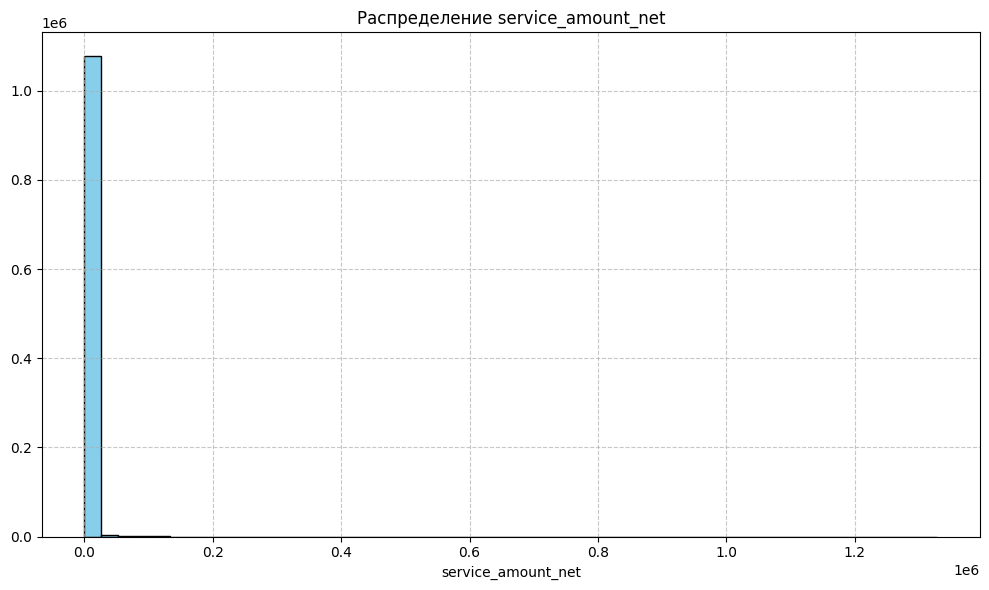

In [ ]:
plot_distr(df=table, column='service_amount_net')

In [ ]:
def plot_boxplot(
    df,
    column,
    color='lightgreen',
    figsize=(10, 6),
    title=None,
    ylabel=None,
    show_stats=True,  # отображает медиану, квартили и IQR
    show_outliers=True
):

    # Устанавливаем значения по умолчанию для заголовка и подписи оси Y
    if title is None:
        title = f'Boxplot of {column}'
    if ylabel is None:
        ylabel = column

    plt.figure(figsize=figsize)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Добавляем аннотации для ключевых статистик (если show_stats=True)
    if show_stats:
      median = df[column].median()
      Q1 = df[column].quantile(0.20)
      Q3 = df[column].quantile(0.80)
      IQR = Q3 - Q1

      # Добавляем аннотации
      plt.text(0.02, median, f'Median: {median:.2f}', color='red', ha='left', va='center')
      plt.text(0.02, Q1, f'Q1: {Q1:.2f}', color='blue', ha='left', va='center')
      plt.text(0.02, Q3, f'Q3: {Q3:.2f}', color='blue', ha='left', va='center')
      plt.text(0.02, (Q1 + Q3) / 2, f'IQR: {IQR:.2f}', color='purple', ha='left', va='center')

    plt.tight_layout()
    plt.show()

    # Выводим описательную статистику
    print(f"Описательная статистика для {column}:")
    print(df[column].describe())

In [ ]:
plot_boxplot(table, column='service_amount_net')

Output hidden; open in https://colab.research.google.com to view.

Большинство выплат небольшие, но есть редкие случаи крупных выплат. Длинный правый хвост.
Большие значения выплат могут быть аномальными. Надо как то ешить с ними проблему.

Оценим выбросы


В общем выбросы есть и их много. Заменим их медианным значением

In [ ]:
# Используем межквартильный размах для определения выброов
Q1 = table['service_amount_net'].quantile(0.15)
Q3 = table['service_amount_net'].quantile(0.85)
iqr = Q3 - Q1
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

out = table[(table['service_amount_net'] < lower_bound) | (table['service_amount_net'] > upper_bound)]
print("Количество выбросов:", len(out))

Количество выбросов: 36504


In [ ]:
# Заменим выбросы медианой
median_am = table['service_amount_net'].median()
table.loc[(table['service_amount_net'] < lower_bound) | (table['service_amount_net'] > upper_bound), 'service_amount_net'] = median_am

In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082029 entries, 0 to 1082028
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   service_date        1082029 non-null  object 
 1   patient_id          1082029 non-null  int64  
 2   service_code        1082029 non-null  int64  
 3   is_hospital         1082029 non-null  int64  
 4   service_amount_net  1082029 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 41.3+ MB


## Этап 2: Агрегация данных

Объеденим данные на более высоком уровене детализации. То есть преобразуем наши данные с почасового уровня на месячный.
Основные плюсы:
- **Снижение шума:** будем пренебрегать случайными колебаниями в течении дня. Агрегация на месячный уровень сглаживает эти колебания, выделяя более устойчивые тренды и сезонные паттерны.
-  **Упрощение моделирования:** снижение анализируемых точек данных
- Пронализируем общие тенденции в течении месяца

### Выбор метода агрегации для каждого столбца
Для каждого столбца нужно выбрать подходящий метод агрегации, исходя из его смысла и роли в задаче
1. service_amount_net:
  - Целевая переменная, которую мы хотим предскзать.
  - Суммирование

2. patient_id:
  - Подсчет уникальных значений, чтобы понять сколько уникальных пациентов обслузивалось в каждом месяце
3. service_code:
  - Подсчет уникальных значений

4. is_hospital
  - Среднее значение, чтобы вычислить долю выплат, связанных с больничными услугами, за каждый месяц

In [ ]:
table['service_date'] = pd.to_datetime(table['service_date'])
# Установим 'ser_datetime' как индекс
table = table.set_index('service_date')
table.head()

,patient_id,service_code,is_hospital,service_amount_net
service_date,,,,
2022-01-01 12:07:00,0,0,0,1925.0
2022-01-01 12:17:00,1,1,0,4800.0
2022-01-01 12:30:00,2,2,0,1710.0
2022-01-01 12:33:00,3,3,0,2040.0
2022-01-01 12:27:00,4,4,0,2200.0


In [ ]:
print(type(table.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
table['service_code'].value_counts().head(100)


,count
service_code,
14,38340
13,31997
0,16671
124,14684
52,14216
...,...
76,2663
254,2588
31,2570


#### По неделям
Агрегация данных по неделям

In [ ]:
table.head()

,patient_id,service_code,is_hospital,service_amount_net
service_date,,,,
2022-01-01 12:07:00,0,0,0,1925.0
2022-01-01 12:17:00,1,1,0,4800.0
2022-01-01 12:30:00,2,2,0,1710.0
2022-01-01 12:33:00,3,3,0,2040.0
2022-01-01 12:27:00,4,4,0,2200.0


In [ ]:
# Сагрегируем данные по неделям
weekly_data = table.resample('W').agg({
    'patient_id':'nunique',
    'service_code':'nunique',
    'is_hospital': 'mean',
    'service_amount_net': 'sum'
}).reset_index()

Как указывалось ранее сделаем взвешенное сглаживание total_amount_net по пропорциональности больных

In [ ]:
# Переименуем колонки для большей информативности
weekly_data.columns = [
    'service_date',
    'unique_patients',
    'unique_service_codes',
    'hospital_proportion',
    'total_amount_net'
]

In [ ]:
weekly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   service_date          105 non-null    datetime64[ns]
 1   unique_patients       105 non-null    int64         
 2   unique_service_codes  105 non-null    int64         
 3   hospital_proportion   105 non-null    float64       
 4   total_amount_net      105 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 4.2 KB


In [ ]:
weekly_data.head()

,service_date,unique_patients,unique_service_codes,hospital_proportion,total_amount_net
0,2022-01-02,111,179,0.103044,673216.49
1,2022-01-09,812,613,0.045954,7158560.10
2,2022-01-16,1475,783,0.081881,13574494.83
3,2022-01-23,1626,769,0.060892,14975443.25
4,2022-01-30,1604,875,0.099414,14853972.00


#### По дням

In [ ]:
table.head()

,patient_id,service_code,is_hospital,service_amount_net
service_date,,,,
2022-01-01 12:07:00,0,0,0,1925.0
2022-01-01 12:17:00,1,1,0,4800.0
2022-01-01 12:30:00,2,2,0,1710.0
2022-01-01 12:33:00,3,3,0,2040.0
2022-01-01 12:27:00,4,4,0,2200.0


In [ ]:
daily_data = table.resample('D').agg({
    'patient_id': 'nunique',
    'service_code': 'nunique',
    'is_hospital': 'mean',
    'service_amount_net': 'sum'
}).reset_index()

In [ ]:
# Переименуем колонки для большей информативности
daily_data.columns = [
    'service_date',
    'unique_patients',
    'unique_service_codes',
    'hospital_proportion',
    'total_amount_net'
]
daily_data.head()

,service_date,unique_patients,unique_service_codes,hospital_proportion,total_amount_net
0,2022-01-01,33,57,0.000000,159311.20
1,2022-01-02,84,158,0.126801,513905.29
2,2022-01-03,163,217,0.023064,894887.34
3,2022-01-04,150,219,0.060932,900470.48
4,2022-01-05,176,267,0.066416,1177938.39


In [ ]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   service_date          730 non-null    datetime64[ns]
 1   unique_patients       730 non-null    int64         
 2   unique_service_codes  730 non-null    int64         
 3   hospital_proportion   730 non-null    float64       
 4   total_amount_net      730 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 28.6 KB


Создадим новые агрегированные признаки для большей информативности:
1. Общее количество выплат за месяц
2. Сумма выплат для больничных и небольничных услуг
3. Количество уникальных пациентов с больничными услугами
4. Доля выплат с высокой стоимостью
5. Разнообразие кодов услуг
6. Средняя стоимость услуги по типам

# По неделям

In [ ]:
weekly_data['service_date'] = pd.to_datetime(weekly_data['service_date'])
weekly_data.set_index('service_date', inplace=True)
type(weekly_data.index)

KeyError: 'service_date'

In [ ]:
# Создадим новые агрегированные признаки для большей информативности

# Добавим медианное значение
median_weekly = table.resample('W')['service_amount_net'].mean()
weekly_data['mean_ammount'] = median_weekly

# 1
weekly_data['total_racords'] = table.resample('W')['service_amount_net'].count()
# 2
weekly_data['hospital_ammount'] = table[table['is_hospital'] == 1].resample('W')['service_amount_net'].sum().reindex(weekly_data.index, fill_value=0)
weekly_data['non_hospital_ammount'] = table[table['is_hospital'] == 0].resample('W')['service_amount_net'].sum().reindex(weekly_data.index, fill_value=0)

# 3
weekly_data['hospital_unique_patients'] = table[table['is_hospital'] == 1].resample('W')['patient_id'].nunique().reindex(weekly_data.index, fill_value=0)

# 4
threshold = table['service_amount_net'].quantile(0.75)
# Подсчитываем количество записей с высокой стоимостью
high_cost_records = table[table['service_amount_net'] > threshold].resample('W')['service_amount_net'].count()
total_records = table.resample('W')['service_amount_net'].count()
# Считаем долю высоких выплат
weekly_data['high_cost_proportion'] = high_cost_records / total_records
weekly_data['high_cost_proportion'].fillna(0, inplace=True) # Заполняем 0 если NaN

# 5
service_code_counts = table.groupby([pd.Grouper(freq='W'), 'service_code']).size().unstack(fill_value=0)
# Вычислим долю каждого кода услуг
service_code_prop = service_code_counts.div(service_code_counts.sum(axis=1), axis=0)
# Вычислим HHI
hhi = (service_code_prop ** 2).sum(axis=1)
weekly_data['service_code_hhi'] = hhi

weekly_data.head()

<ipython-input-53-7aff64a98a42>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weekly_data['high_cost_proportion'].fillna(0, inplace=True) # Заполняем 0 если NaN


,unique_patients,unique_service_codes,hospital_proportion,total_amount_net,mean_ammount,total_racords,hospital_ammount,non_hospital_ammount,hospital_unique_patients,high_cost_proportion,service_code_hhi
service_date,,,,,,,,,,,
2022-01-02,111,179,0.103044,673216.49,1576.619415,427,26930.00,646286.49,1,0.203747,0.011600
2022-01-09,812,613,0.045954,7158560.10,1604.698521,4461,216619.48,6941940.62,7,0.227079,0.009136
2022-01-16,1475,783,0.081881,13574494.83,1702.131013,7975,821270.87,12753223.96,25,0.244389,0.007689
2022-01-23,1626,769,0.060892,14975443.25,1743.560746,8589,737067.73,14238375.52,23,0.253580,0.008505
2022-01-30,1604,875,0.099414,14853972.00,1741.380070,8530,1084899.85,13769072.15,18,0.253576,0.007721


### По дням

In [ ]:
daily_data['service_date'] = pd.to_datetime(daily_data['service_date'])
daily_data.set_index('service_date', inplace=True)
type(daily_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
# Создадим новые агрегированные признаки для большей информативности

# Добавим медианное значение
median_daily = table.resample('D')['service_amount_net'].mean()
daily_data['mean_ammount'] = median_daily

# 1
daily_data['total_racords'] = table.resample('D')['service_amount_net'].count()
# 2
daily_data['hospital_ammount'] = table[table['is_hospital'] == 1].resample('D')['service_amount_net'].sum().reindex(daily_data.index, fill_value=0)
daily_data['non_hospital_ammount'] = table[table['is_hospital'] == 0].resample('D')['service_amount_net'].sum().reindex(daily_data.index, fill_value=0)

# 3
daily_data['hospital_unique_patients'] = table[table['is_hospital'] == 1].resample('D')['patient_id'].nunique().reindex(daily_data.index, fill_value=0)

# 4
threshold = table['service_amount_net'].quantile(0.75)
# Подсчитываем количество записей с высокой стоимостью
high_cost_records = table[table['service_amount_net'] > threshold].resample('D')['service_amount_net'].count()
total_records = table.resample('D')['service_amount_net'].count()
# Считаем долю высоких выплат
daily_data['high_cost_proportion'] = high_cost_records / total_records
daily_data['high_cost_proportion'].fillna(0, inplace=True) # Заполняем 0 если NaN

# 5
service_code_counts = table.groupby([pd.Grouper(freq='D'), 'service_code']).size().unstack(fill_value=0)
# Вычислим долю каждого кода услуг
service_code_prop = service_code_counts.div(service_code_counts.sum(axis=1), axis=0)
# Вычислим HHI
hhi = (service_code_prop ** 2).sum(axis=1)
daily_data['service_code_hhi'] = hhi

daily_data.head()

<ipython-input-65-14c75d74c17f>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_data['high_cost_proportion'].fillna(0, inplace=True) # Заполняем 0 если NaN


,unique_patients,unique_service_codes,hospital_proportion,total_amount_net,mean_ammount,total_racords,hospital_ammount,non_hospital_ammount,hospital_unique_patients,high_cost_proportion,service_code_hhi
service_date,,,,,,,,,,,
2022-01-01,33,57,0.000000,159311.20,1991.390000,80,0.00,159311.20,0,0.212500,0.023125
2022-01-02,84,158,0.126801,513905.29,1480.995072,347,26930.00,486975.29,1,0.201729,0.012233
2022-01-03,163,217,0.023064,894887.34,1474.278979,607,12827.22,882060.12,1,0.191104,0.013253
2022-01-04,150,219,0.060932,900470.48,1613.746380,558,28827.86,871642.62,2,0.232975,0.010778
2022-01-05,176,267,0.066416,1177938.39,1476.113271,798,59126.81,1118811.58,5,0.196742,0.010584


In [ ]:
# Сохраним датасеты
daily_data.to_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/daily_data_1')
weekly_data.to_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/weekly_data_1')

## Этап 3: Визуализация временных рядов

- Оценим общую картину распределения данных
- Посмотрим на характер данных
- Выявим аномалии, если они есть

In [ ]:
daily_data = pd.read_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/daily_data_1')
daily_data.head()

,service_date,unique_patients,unique_service_codes,hospital_proportion,total_amount_net,mean_ammount,total_racords,hospital_ammount,non_hospital_ammount,hospital_unique_patients,high_cost_proportion,service_code_hhi
0,2022-01-01,33,57,0.000000,159311.20,1991.390000,80,0.00,159311.20,0,0.212500,0.023125
1,2022-01-02,84,158,0.126801,513905.29,1480.995072,347,26930.00,486975.29,1,0.201729,0.012233
2,2022-01-03,163,217,0.023064,894887.34,1474.278979,607,12827.22,882060.12,1,0.191104,0.013253
3,2022-01-04,150,219,0.060932,900470.48,1613.746380,558,28827.86,871642.62,2,0.232975,0.010778
4,2022-01-05,176,267,0.066416,1177938.39,1476.113271,798,59126.81,1118811.58,5,0.196742,0.010584


In [ ]:
daily_data['service_date'] = pd.to_datetime(daily_data['service_date'])
daily_data.set_index('service_date', inplace=True)
type(daily_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

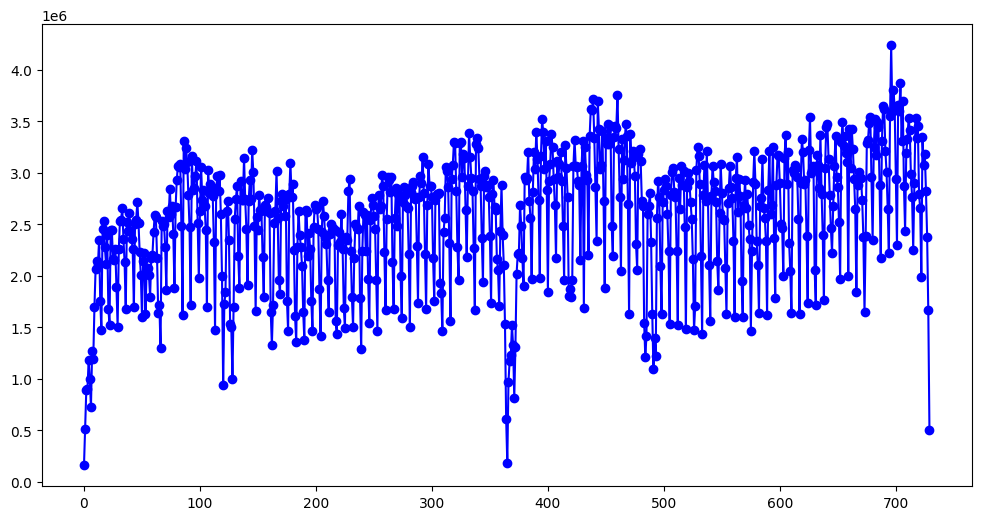

In [ ]:
# Оценим распределения суммы выплат по месяцам
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['total_amount_net'], marker='o', linestyle='-', color='b')


1. Скользящее среднее - это метод сглаживания временного ряда, который помогает выделить тренд, уменьшая влияние случайных колебаний. Оно вычисляется как среднее значение ряда за определённое количество предыдущих точек (окно).
2. Аномалии - значения временного ряда, которые значительно отклоняются от ожидаемого поведения. Характеризуют необычные события.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_informative_series(
    data,
    value_col,      # назавание колонки с основным временным рядом
    rolling_window=3, # размер окня для скользящего среднего
    anomaly_threshold=2, # порог для определеняи аномалий
    title='График',
    ylabel='Итоговая сумма ввыплат',
    figsize=(14, 8)):

    # фигура и оси
    fig, ax1 = plt.subplots(figsize=figsize)

    # основной временной ряд
    ax1.plot(data.index, data[value_col], marker='o', linestyle='-', color='b', label=value_col)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(ylabel, color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # скользящее среднее
    rolling_mean = data[value_col].rolling(window=rolling_window, center=True).mean()
    ax1.plot(data.index, rolling_mean, linestyle='--', color='orange', label=f'{rolling_window}-Month Rolling Mean')

    # определение аномалий
    rolling_std = data[value_col].rolling(window=rolling_window, center=True).std()
    upper_bound = rolling_mean + anomaly_threshold * rolling_std
    lower_bound = rolling_mean - anomaly_threshold * rolling_std

    anomalies = data[(data[value_col] > upper_bound) | (data[value_col] < lower_bound)]

    # отображение аномалий
    if not anomalies.empty:
      ax1.scatter(anomalies.index, anomalies[value_col], color='red', s=100, label='Anomalies', zorder=5)

      # Анотации
      for idx, value in anomalies[value_col].items():
        ax1.annotate(f'{value:,.0f}', (idx, value), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

    # Тренд для доп информации
    decomposition = seasonal_decompose(data[value_col], model='additive', period=12)
    trend = decomposition.trend
    ax1.plot(data.index, trend, linestyle='-.', color='purple', label='Trend')

    # Добавим сетку
    ax1.grid(True, linestyle='--', alpha=0.7)
    # Устанавливаем метки для каждого месяца
    ax1.set_xticks(data.index)  # Указываем все даты из индекса
    ax1.set_xticklabels(data.index.strftime('%Y-%m'), rotation=45, ha='right', fontsize=8)
    # Добавляем заголовок
    plt.title(title, fontsize=14, pad=20)

    # ktutylf
    lines1, labels1 = ax1.get_legend_handles_labels()
    ax1.legend(lines1, labels1, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.tight_layout()
    plt.show()

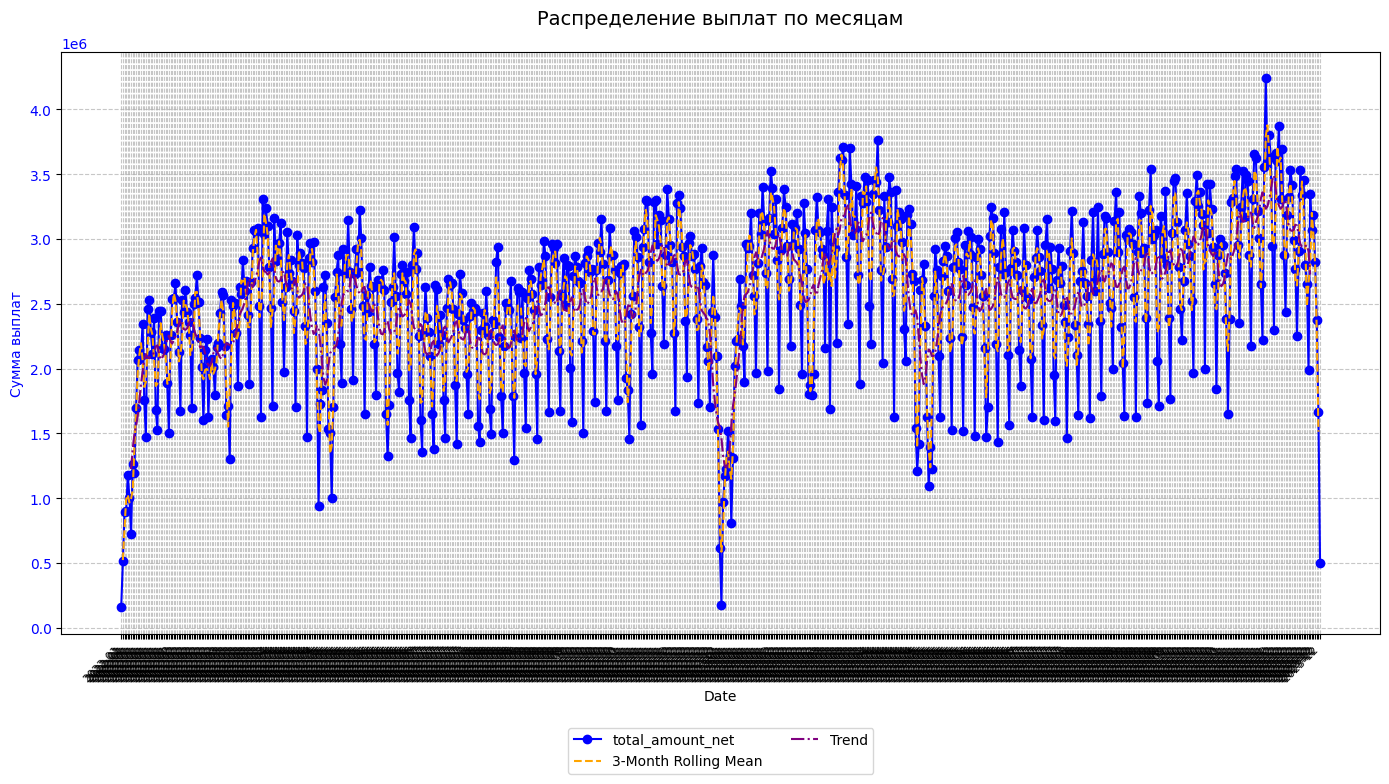

In [ ]:
plot_informative_series(
    data=daily_data,
    value_col='total_amount_net',
    title='Распределение выплат по месяцам',
    ylabel='Сумма выплат')


1. Скользящее среднее растёт, это подтверждает восходящий тренд
2. Тренд частично совпадает со скользящим среднем, что подтверждает надежность роста выплат ежегодно.
3. Стоит отметить полное отсутвие аномалий, что очень хорошо для дальнейшей задачи составления прогноза
4. Говорить о сезонности в каком то ключе можно, но стоит заметить, что она не явная. Хотя зимний период характеризуется ростом выплат.

In [ ]:
# Добавим возможность анализировать второй признак на одном графике для выявления зависимости
def plot_informative_series_tow(
    data,
    value_col,      # назавание колонки с основным временным рядом
    secondary_col=None,
    rolling_window=3, # размер окня для скользящего среднего
    anomaly_threshold=2, # порог для определеняи аномалий
    title='Распределение выплат по месяцам',
    ylabel='Cумма ввыплат',
    secondary_ylabel=None,
    figsize=(14, 8)):

    # фигура и оси
    fig, ax1 = plt.subplots(figsize=figsize)

    # основной временной ряд
    ax1.plot(data.index, data[value_col], marker='o', linestyle='-', color='b', label=value_col)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(ylabel, color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # скользящее среднее
    rolling_mean = data[value_col].rolling(window=rolling_window, center=True).mean()
    ax1.plot(data.index, rolling_mean, linestyle='--', color='orange', label=f'{rolling_window}-Month Rolling Mean')

    # определение аномалий
    rolling_std = data[value_col].rolling(window=rolling_window, center=True).std()
    upper_bound = rolling_mean + anomaly_threshold * rolling_std
    lower_bound = rolling_mean - anomaly_threshold * rolling_std

    anomalies = data[(data[value_col] > upper_bound) | (data[value_col] < lower_bound)]

    # отображение аномалий
    if not anomalies.empty:
      ax1.scatter(anomalies.index, anomalies[value_col], color='red', s=100, label='Anomalies', zorder=5)

      # Анотации
      for idx, value in anomalies[value_col].items():
        ax1.annotate(f'{value:,.0f}', (idx, value), textcoords="offset points", xytext=(0, 10), ha='center', color='red')

    # 4. Вторая ось
    if secondary_col is not None:
        ax2 = ax1.twinx()
        ax2.plot(data.index, data[secondary_col], marker='s', linestyle='-', color='green', label=secondary_col)
        ax2.set_ylabel(secondary_ylabel if secondary_ylabel else secondary_col, color='green')
        ax2.tick_params(axis='y', labelcolor='green')

    # Тренд для доп информации
    decomposition = seasonal_decompose(data[value_col], model='additive', period=12)
    trend = decomposition.trend
    ax1.plot(data.index, trend, linestyle='-.', color='purple', label='Trend')

    # Добавим сетку
    ax1.grid(True, linestyle='--', alpha=0.7)
    # Устанавливаем метки для каждого месяца
    ax1.set_xticks(data.index)  # Указываем все даты из индекса
    ax1.set_xticklabels(data.index.strftime('%Y-%m'), rotation=45, ha='right', fontsize=8)
    # Добавляем заголовок
    plt.title(title, fontsize=14, pad=20)

    # ktutylf
    lines1, labels1 = ax1.get_legend_handles_labels()
    if secondary_col is not None:
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    else:
        ax1.legend(lines1, labels1, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.tight_layout()
    plt.show()


Возьмем недельный датасет

In [ ]:
weekly_data = pd.read_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/weekly_data_1')
weekly_data.head()

,service_date,unique_patients,unique_service_codes,hospital_proportion,total_amount_net,mean_ammount,total_racords,hospital_ammount,non_hospital_ammount,hospital_unique_patients,high_cost_proportion,service_code_hhi
0,2022-01-02,111,179,0.103044,673216.49,1576.619415,427,26930.00,646286.49,1,0.203747,0.011600
1,2022-01-09,812,613,0.045954,7158560.10,1604.698521,4461,216619.48,6941940.62,7,0.227079,0.009136
2,2022-01-16,1475,783,0.081881,13574494.83,1702.131013,7975,821270.87,12753223.96,25,0.244389,0.007689
3,2022-01-23,1626,769,0.060892,14975443.25,1743.560746,8589,737067.73,14238375.52,23,0.253580,0.008505
4,2022-01-30,1604,875,0.099414,14853972.00,1741.380070,8530,1084899.85,13769072.15,18,0.253576,0.007721


In [ ]:
weekly_data['service_date'] = pd.to_datetime(weekly_data['service_date'])
weekly_data.set_index('service_date', inplace=True)
type(weekly_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
weekly_data.head()

,unique_patients,unique_service_codes,hospital_proportion,total_amount_net,mean_ammount,total_racords,hospital_ammount,non_hospital_ammount,hospital_unique_patients,high_cost_proportion,service_code_hhi
service_date,,,,,,,,,,,
2022-01-02,111,179,0.103044,673216.49,1576.619415,427,26930.00,646286.49,1,0.203747,0.011600
2022-01-09,812,613,0.045954,7158560.10,1604.698521,4461,216619.48,6941940.62,7,0.227079,0.009136
2022-01-16,1475,783,0.081881,13574494.83,1702.131013,7975,821270.87,12753223.96,25,0.244389,0.007689
2022-01-23,1626,769,0.060892,14975443.25,1743.560746,8589,737067.73,14238375.52,23,0.253580,0.008505
2022-01-30,1604,875,0.099414,14853972.00,1741.380070,8530,1084899.85,13769072.15,18,0.253576,0.007721


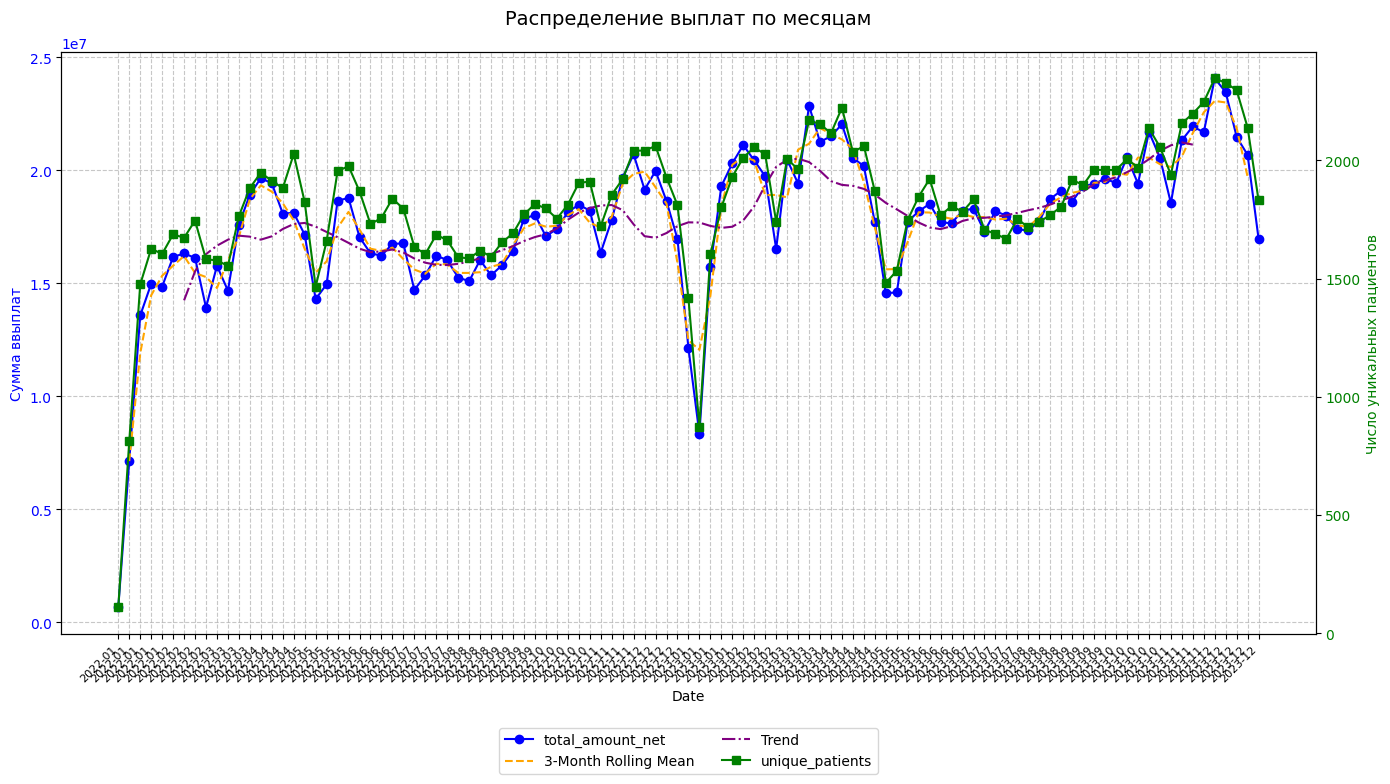

In [ ]:
# Посмотрим корреляцию нашего основного признака со всеми остальными, которые у нас есть
plot_informative_series_tow(
    data=weekly_data,
    value_col='total_amount_net',
    secondary_col='unique_patients',
    rolling_window=3,
    anomaly_threshold=2,
    secondary_ylabel='Число уникальных пациентов'
)

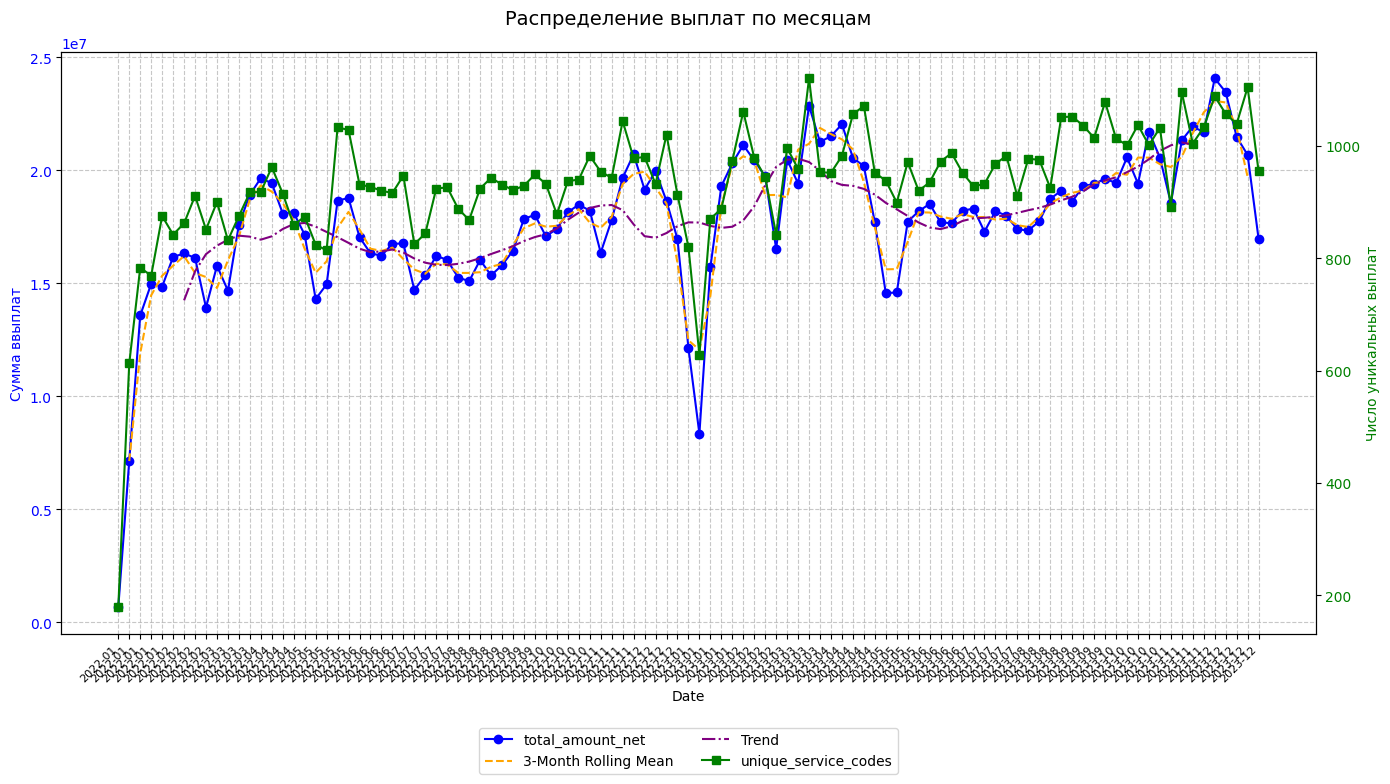

In [ ]:
plot_informative_series_tow(
    data=weekly_data,
    value_col='total_amount_net',
    secondary_col='unique_service_codes',
    rolling_window=3,
    anomaly_threshold=2,
    secondary_ylabel='Число уникальных выплат'
)

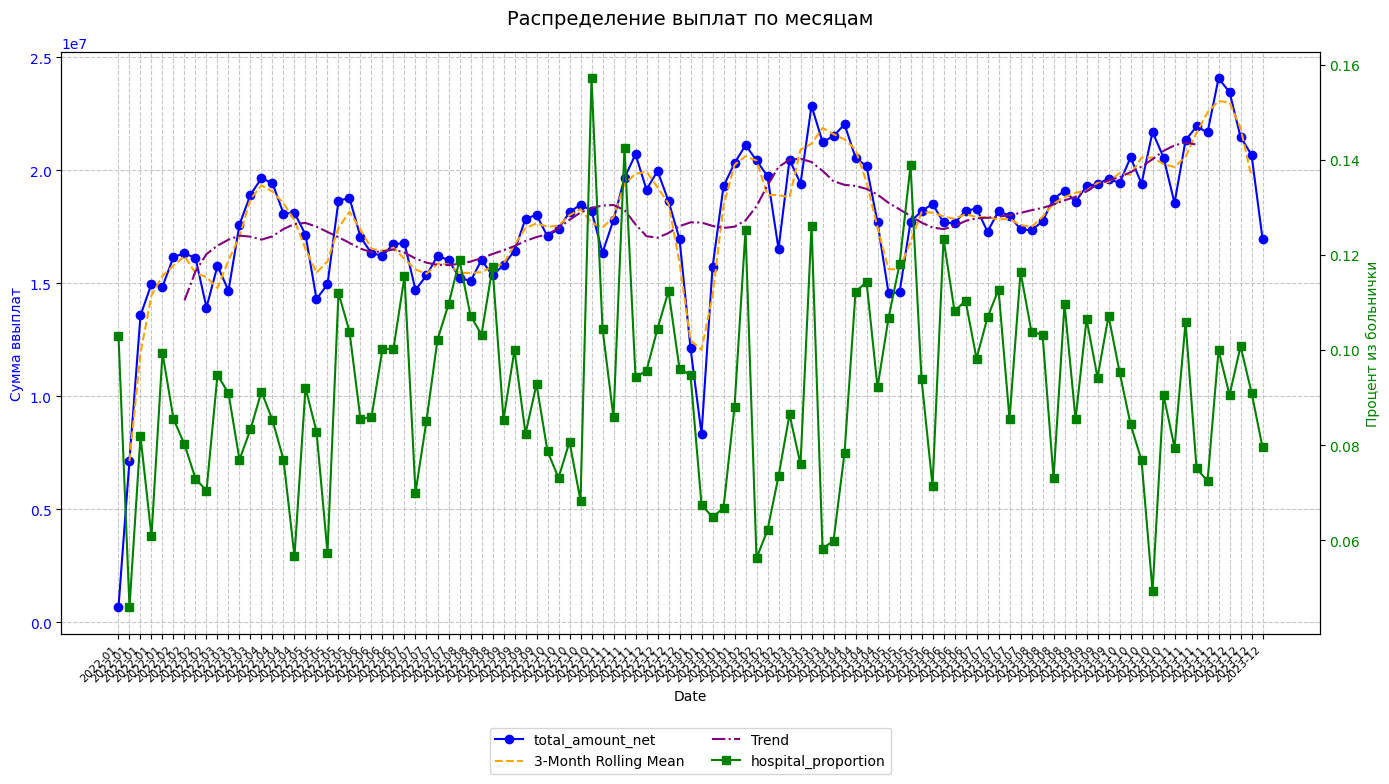

In [ ]:
plot_informative_series_tow(
    data=weekly_data,
    value_col='total_amount_net',
    secondary_col='hospital_proportion',
    rolling_window=3,
    anomaly_threshold=2,
    secondary_ylabel='Процент из больнички'
)

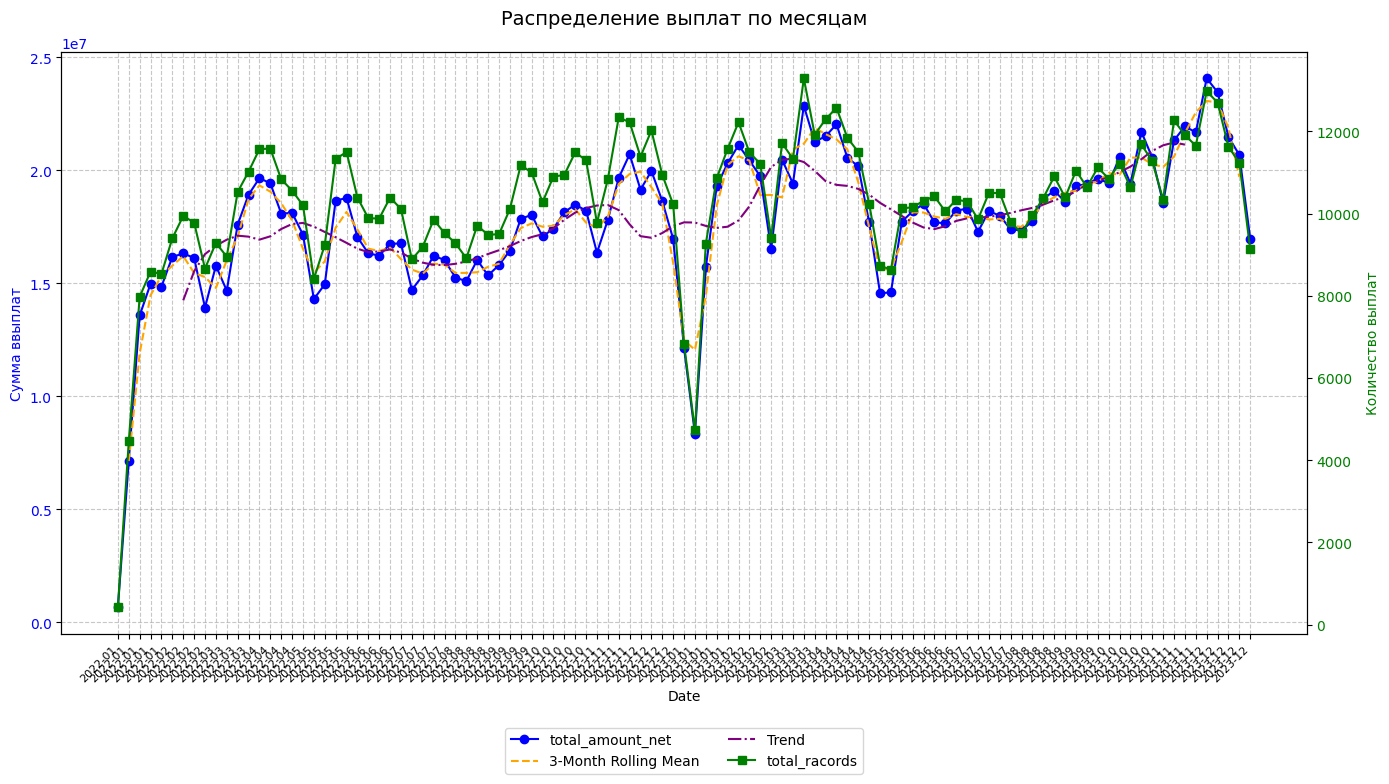

In [ ]:
plot_informative_series_tow(
    data=weekly_data,
    value_col='total_amount_net',
    secondary_col='total_racords',
    rolling_window=3,
    anomaly_threshold=2,
    secondary_ylabel='Количество выплат'
)

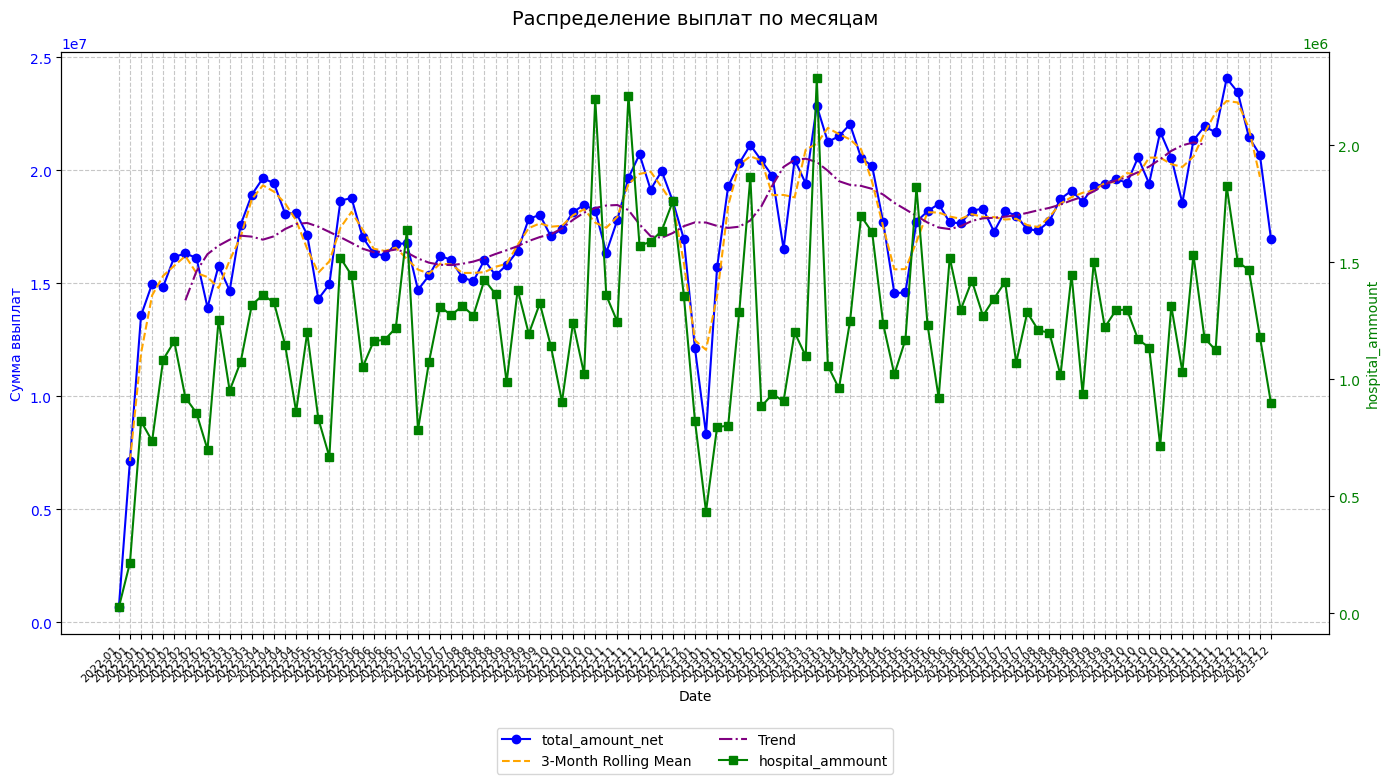

In [ ]:
plot_informative_series_tow(
    data=weekly_data,
    value_col='total_amount_net',
    secondary_col='hospital_ammount',
    rolling_window=3,
    anomaly_threshold=2,
    secondary_ylabel='hospital_ammount'
)

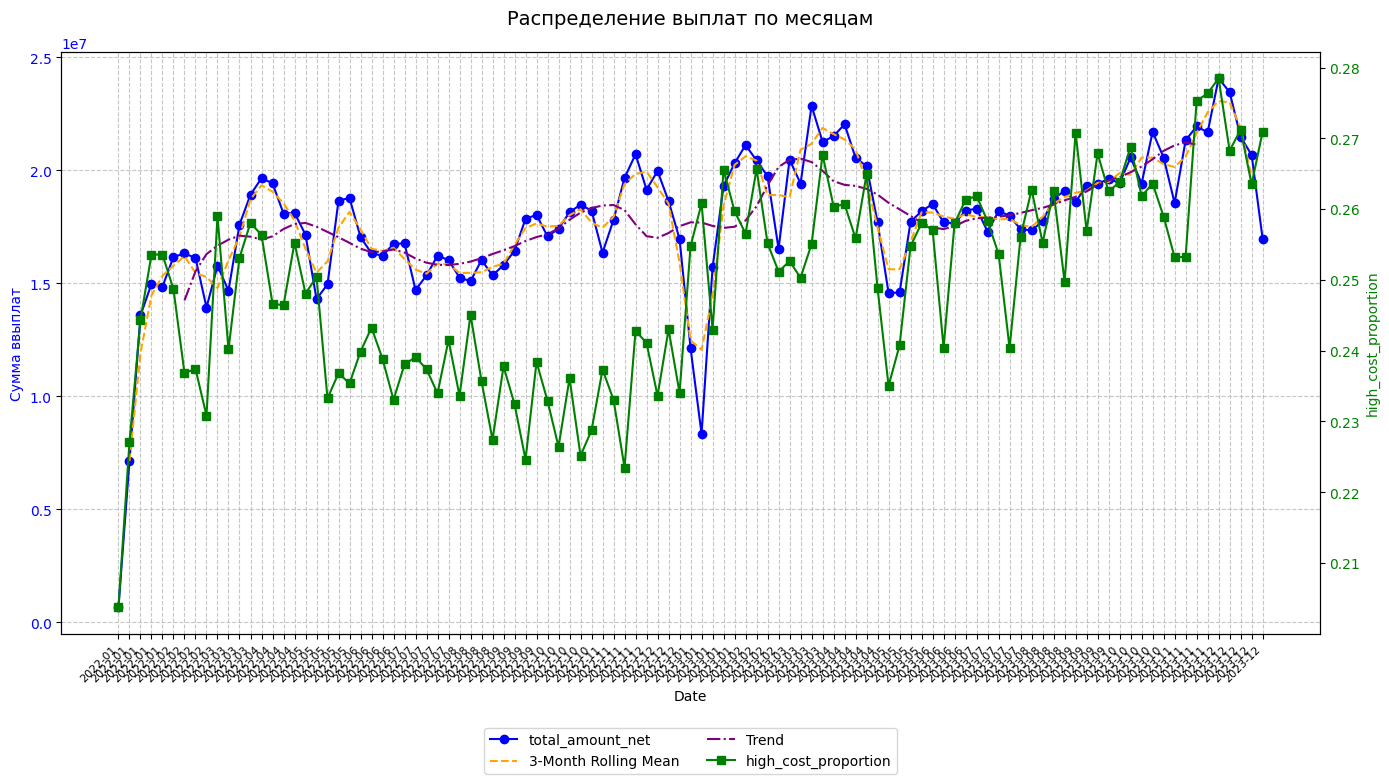

In [ ]:

plot_informative_series_tow(
    data=weekly_data,
    value_col='total_amount_net',
    secondary_col='high_cost_proportion',
    rolling_window=3,
    anomaly_threshold=2,
    secondary_ylabel='high_cost_proportion'
)

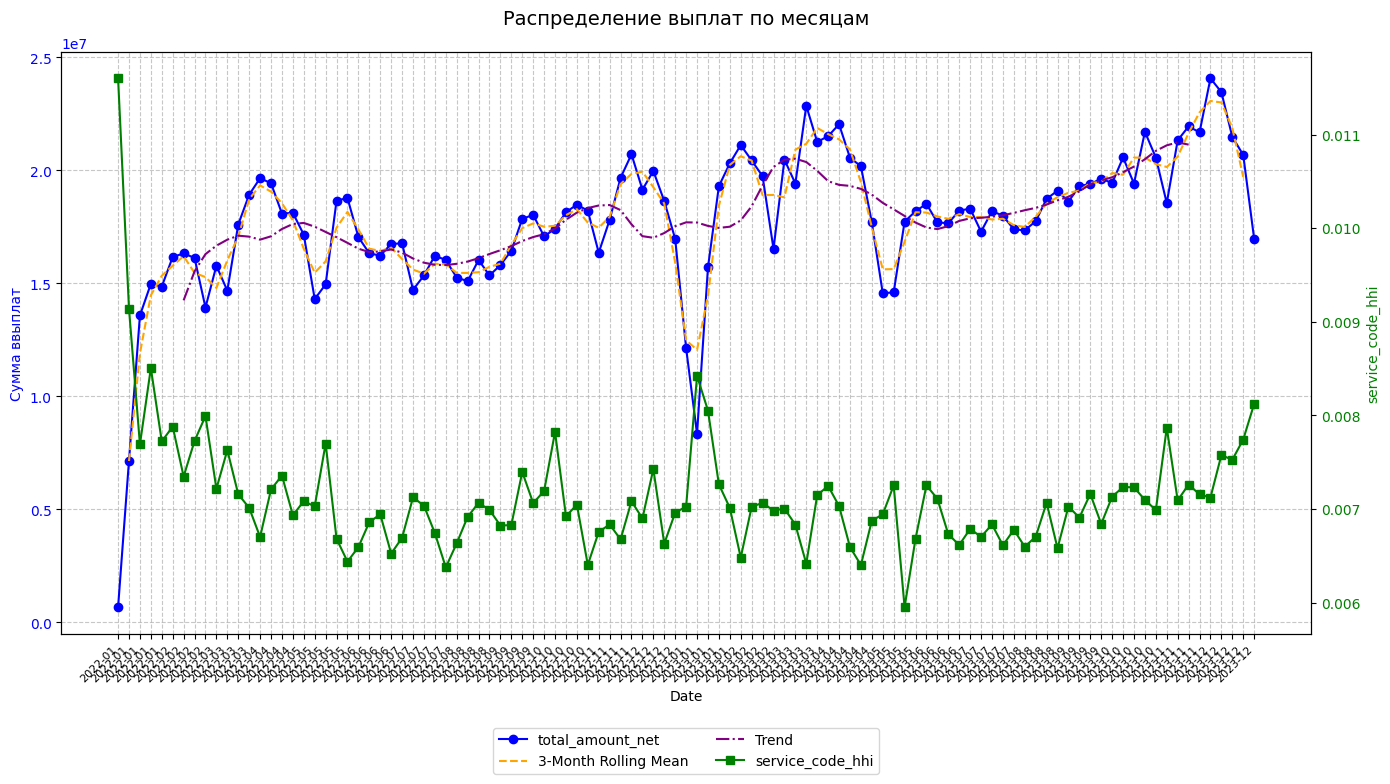

In [ ]:
plot_informative_series_tow(
    data=weekly_data,
    value_col='total_amount_net',
    secondary_col='service_code_hhi',
    rolling_window=3,
    anomaly_threshold=2,
    secondary_ylabel='service_code_hhi'
)

In [ ]:
def plot_correlation(df, method='pearson'):
    corr_matrix = df.corr(method=method)
    return corr_matrix

In [ ]:
plot_correlation(weekly_data)

,unique_patients,unique_service_codes,hospital_proportion,total_amount_net,mean_ammount,total_racords,hospital_ammount,non_hospital_ammount,hospital_unique_patients,high_cost_proportion,service_code_hhi
unique_patients,1.000000,0.875276,0.025862,0.973122,0.461329,0.954114,0.569485,0.971026,0.705085,0.533655,-0.590041
unique_service_codes,0.875276,1.000000,0.294512,0.888064,0.402547,0.883837,0.703905,0.864139,0.705718,0.461573,-0.749535
hospital_proportion,0.025862,0.294512,1.000000,0.068404,-0.148038,0.119180,0.766295,-0.018536,0.457715,-0.167414,-0.413087
total_amount_net,0.973122,0.888064,0.068404,1.000000,0.500227,0.971348,0.605152,0.995464,0.706337,0.568533,-0.597345
mean_ammount,0.461329,0.402547,-0.148038,0.500227,1.000000,0.285359,0.028891,0.530681,0.101143,0.930701,-0.094522
total_racords,0.954114,0.883837,0.119180,0.971348,0.285359,1.000000,0.666483,0.957540,0.756643,0.382464,-0.657785
hospital_ammount,0.569485,0.703905,0.766295,0.605152,0.028891,0.666483,1.000000,0.526665,0.817625,0.086327,-0.667705
non_hospital_ammount,0.971026,0.864139,-0.018536,0.995464,0.530681,0.957540,0.526665,1.000000,0.656504,0.596753,-0.558040
hospital_unique_patients,0.705085,0.705718,0.457715,0.706337,0.101143,0.756643,0.817625,0.656504,1.000000,0.178724,-0.647808
high_cost_proportion,0.533655,0.461573,-0.167414,0.568533,0.930701,0.382464,0.086327,0.596753,0.178724,1.000000,-0.206865


In [ ]:
plot_correlation(daily_data)

,unique_patients,unique_service_codes,hospital_proportion,total_amount_net,mean_ammount,total_racords,hospital_ammount,non_hospital_ammount,hospital_unique_patients,high_cost_proportion,service_code_hhi
unique_patients,1.000000,0.895541,0.318846,0.973499,0.336901,0.949910,0.648291,0.968611,0.645385,0.410114,-0.527309
unique_service_codes,0.895541,1.000000,0.543586,0.916656,0.189792,0.930656,0.777514,0.884763,0.746689,0.276887,-0.631127
hospital_proportion,0.318846,0.543586,1.000000,0.340274,-0.075698,0.388977,0.809127,0.243417,0.692442,-0.008023,-0.416957
total_amount_net,0.973499,0.916656,0.340274,1.000000,0.378675,0.966287,0.679333,0.992791,0.650477,0.451062,-0.538417
mean_ammount,0.336901,0.189792,-0.075698,0.378675,1.000000,0.136505,0.080060,0.404887,0.031290,0.903628,-0.117308
total_racords,0.949910,0.930656,0.388977,0.966287,0.136505,1.000000,0.712053,0.950235,0.694305,0.237516,-0.543327
hospital_ammount,0.648291,0.777514,0.809127,0.679333,0.080060,0.712053,1.000000,0.586478,0.872782,0.151794,-0.472039
non_hospital_ammount,0.968611,0.884763,0.243417,0.992791,0.404887,0.950235,0.586478,1.000000,0.575406,0.473066,-0.517177
hospital_unique_patients,0.645385,0.746689,0.692442,0.650477,0.031290,0.694305,0.872782,0.575406,1.000000,0.093441,-0.477266
high_cost_proportion,0.410114,0.276887,-0.008023,0.451062,0.903628,0.237516,0.151794,0.473066,0.093441,1.000000,-0.229874


Как видно из матрицы большинство признаков, кроме hospital_proportion, имеют сильную и умеренную корреляцию с целевой переменной. Оставляем все кроме hospital_proportion

In [ ]:
weekly_data.drop(['hospital_proportion'], axis=1, inplace=True)
daily_data.drop(['hospital_proportion'], axis=1, inplace=True)

In [ ]:
# Переставим индекс для удобства
new_order = ['unique_patients', 'hospital_ammount', 'non_hospital_ammount', 'hospital_unique_patients', 'unique_service_codes', 'high_cost_proportion', 'service_code_hhi', 'mean_ammount', 'total_racords', 'total_amount_net']
weekly_data = weekly_data[new_order]
daily_data = daily_data[new_order]

In [ ]:
weekly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2022-01-02 to 2023-12-31
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unique_patients           105 non-null    int64  
 1   hospital_ammount          105 non-null    float64
 2   non_hospital_ammount      105 non-null    float64
 3   hospital_unique_patients  105 non-null    int64  
 4   unique_service_codes      105 non-null    int64  
 5   high_cost_proportion      105 non-null    float64
 6   service_code_hhi          105 non-null    float64
 7   mean_ammount              105 non-null    float64
 8   total_racords             105 non-null    int64  
 9   total_amount_net          105 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 9.0 KB


In [ ]:
# Сохраним датасеты
daily_data.to_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/daily_data_2')
weekly_data.to_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/weekly_data_2')

In [ ]:
daily_data = pd.read_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/daily_data_2')
daily_data.head()

,service_date,unique_patients,hospital_ammount,non_hospital_ammount,hospital_unique_patients,unique_service_codes,high_cost_proportion,service_code_hhi,mean_ammount,total_racords,total_amount_net
0,2022-01-01,33,0.00,159311.20,0,57,0.212500,0.023125,1991.390000,80,159311.20
1,2022-01-02,84,26930.00,486975.29,1,158,0.201729,0.012233,1480.995072,347,513905.29
2,2022-01-03,163,12827.22,882060.12,1,217,0.191104,0.013253,1474.278979,607,894887.34
3,2022-01-04,150,28827.86,871642.62,2,219,0.232975,0.010778,1613.746380,558,900470.48
4,2022-01-05,176,59126.81,1118811.58,5,267,0.196742,0.010584,1476.113271,798,1177938.39


In [ ]:
def decompose_time_series(data, column, period=7, model='additive'):
    """
    - data: датасет
    - column: название столбца для анализа
    - period: период сезонности (по умолчанию 7 для недельной сезонности)
    - model: тип декомпозиции ('additive' или 'multiplicative')

    return: объект с результатами декомпозиции (тренд, сезонность, остатки)
    """

    # Выбираем столбец для анализа
    series = data[column]

    # Выполняем декомпозицию
    decomposition = seasonal_decompose(series, model=model, period=period)

    # Визуализация компонентов
    plt.figure(figsize=(14, 10))

    # Исходный ряд
    plt.subplot(4, 1, 1)
    plt.plot(series, label='Исходный ряд', color='blue')
    plt.title(f'Декомпозиция временного ряда: {column}', fontsize=14)
    plt.legend(loc='best')

    # Тренд
    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Тренд', color='orange')
    plt.legend(loc='best')

    # Сезонность
    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Сезонность', color='green')
    plt.legend(loc='best')

    # Остатки
    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Остатки', color='red')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

    return decomposition


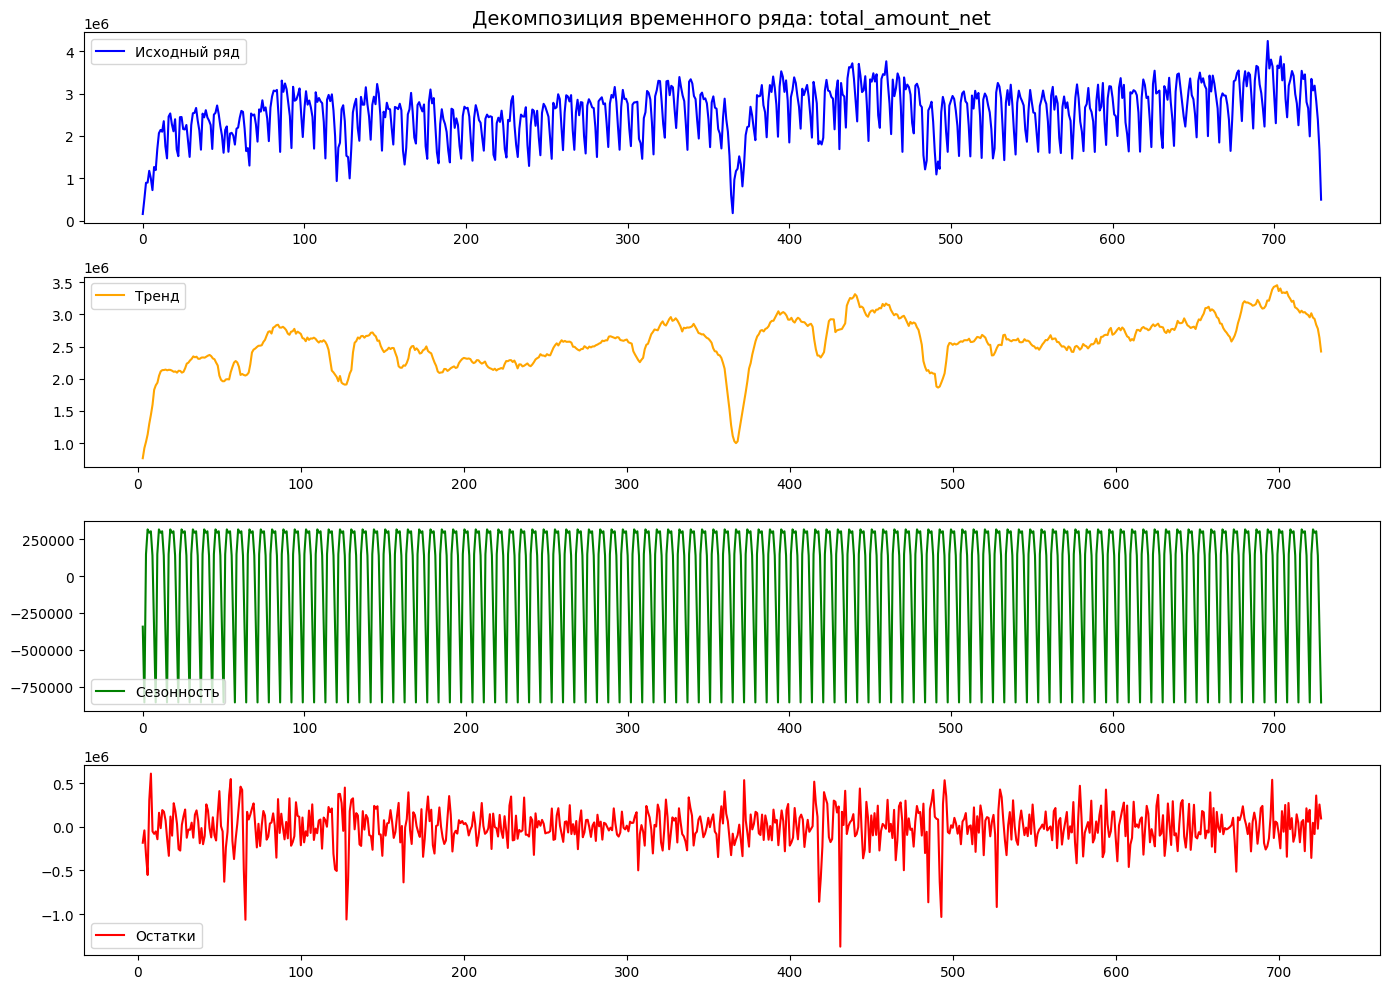

In [ ]:
decomposition = decompose_time_series(daily_data, column='total_amount_net', period=7, model='additive')

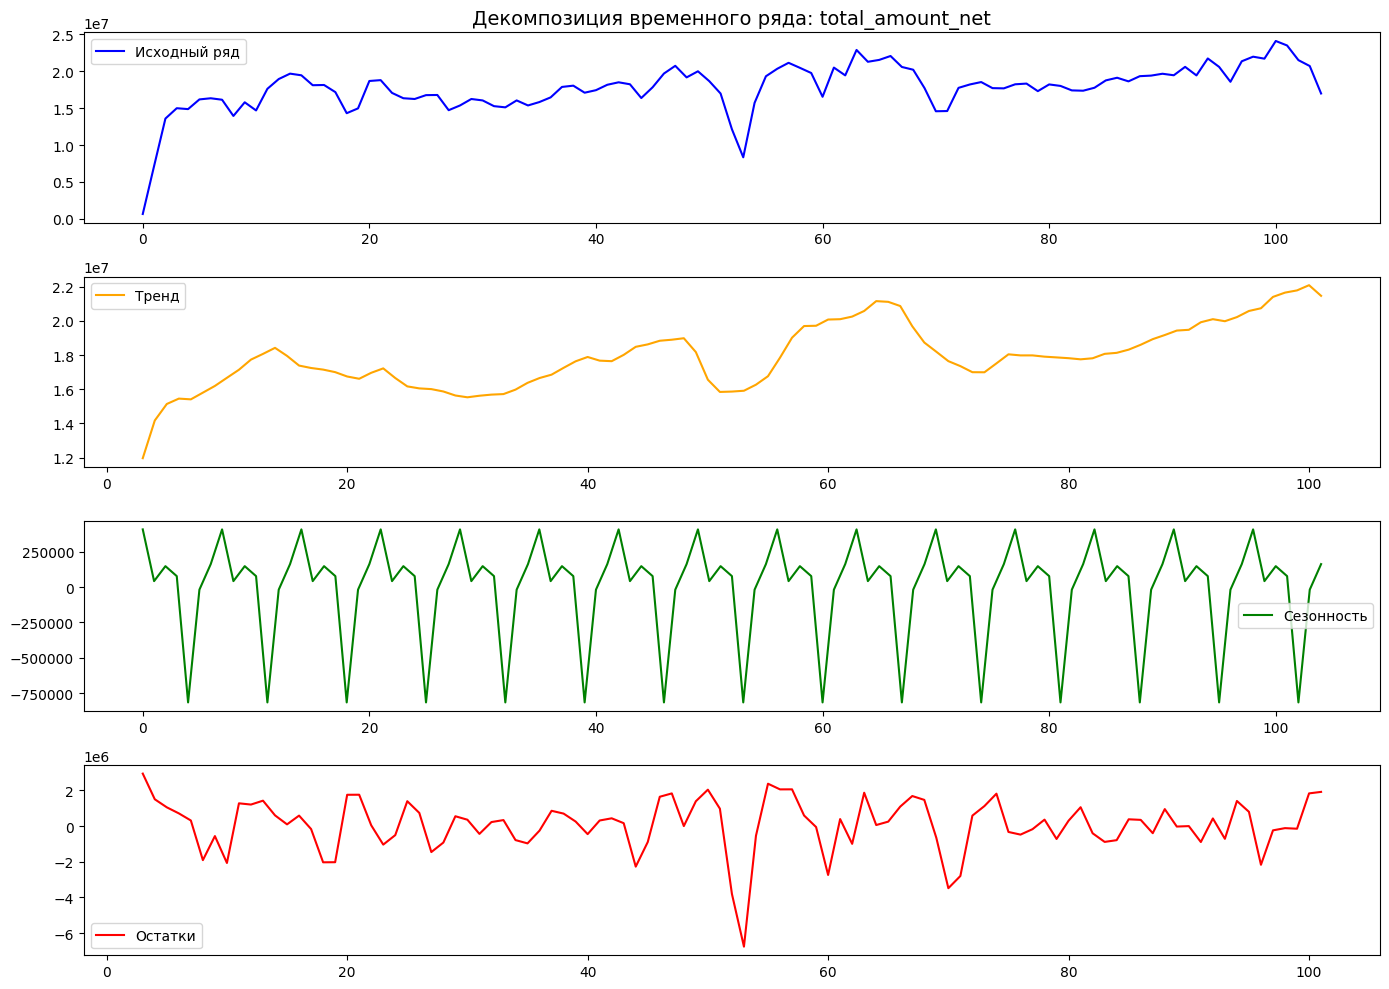

In [ ]:
decomposition = decompose_time_series(weekly_data, column='total_amount_net', period=7, model='additive')

Делаем вывод, что тренд устойчив к росту и прослеживается явная сезонность.

Для df_day вывели для формальности, слишком маленький шаг, но даже для дней видно наличие сезонности.

Присутствует тренд и сезонность, они хорошо выражены. Выплат становится постоянно все больше и больше, а пики выплат приходятся на апрель и декабрь. Шумов нет.

Также данные стационарные относительно дней и недель, но нестационарные относительно месяцев, в этом можно также убедиться с помощью теста Дики-Фуллера, если значение p-value > 0.05, то нулевая гипотеза (данные нестационарныея) подтвердится.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
daily_data.head()

,service_date,unique_patients,hospital_ammount,non_hospital_ammount,hospital_unique_patients,unique_service_codes,high_cost_proportion,service_code_hhi,mean_ammount,total_racords,total_amount_net
0,2022-01-01,33,0.00,159311.20,0,57,0.212500,0.023125,1991.390000,80,159311.20
1,2022-01-02,84,26930.00,486975.29,1,158,0.201729,0.012233,1480.995072,347,513905.29
2,2022-01-03,163,12827.22,882060.12,1,217,0.191104,0.013253,1474.278979,607,894887.34
3,2022-01-04,150,28827.86,871642.62,2,219,0.232975,0.010778,1613.746380,558,900470.48
4,2022-01-05,176,59126.81,1118811.58,5,267,0.196742,0.010584,1476.113271,798,1177938.39


In [ ]:
weekly_data.head()

,service_date,unique_patients,hospital_ammount,non_hospital_ammount,hospital_unique_patients,unique_service_codes,high_cost_proportion,service_code_hhi,mean_ammount,total_racords,total_amount_net
0,2022-01-02,111,26930.00,646286.49,1,179,0.203747,0.011600,1576.619415,427,673216.49
1,2022-01-09,812,216619.48,6941940.62,7,613,0.227079,0.009136,1604.698521,4461,7158560.10
2,2022-01-16,1475,821270.87,12753223.96,25,783,0.244389,0.007689,1702.131013,7975,13574494.83
3,2022-01-23,1626,737067.73,14238375.52,23,769,0.253580,0.008505,1743.560746,8589,14975443.25
4,2022-01-30,1604,1084899.85,13769072.15,18,875,0.253576,0.007721,1741.380070,8530,14853972.00


In [ ]:
# Оценка стационарности с помощью теста Дики-Фуллера
adf_test_day = adfuller(daily_data['total_amount_net'])
adf_test_week = adfuller(weekly_data['total_amount_net'])

print('df_day:')
if adf_test_day[1] < 0.05:
    print(f"Ряд стационарен; p-value = {adf_test_day[1]} < 0.05")
else:
    print(f"Ряд нестационарен; p-value = {adf_test_day[1]} >= 0.05")

print('df_week:')
if adf_test_week[1] < 0.05:
    print(f"Ряд стационарен; p-value = {adf_test_week[1]} < 0.05")
else:
    print(f"Ряд нестационарен; p-value = {adf_test_week[1]} >= 0.05")


df_day:
Ряд стационарен; p-value = 0.00786563645465641 < 0.05
df_week:
Ряд стационарен; p-value = 3.1687306029588244e-06 < 0.05


Приходим к выводу, что оба ряда являются стационарными

#### Создадим автокорреляционную функцию, чтобы понять какие лаги можно использовать для задачи.

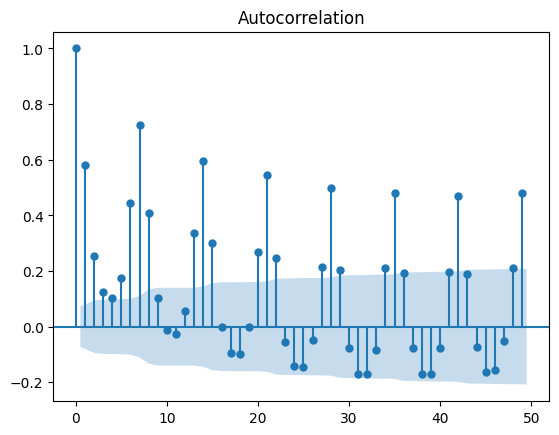

In [ ]:
# автокорреляционная функция (ACF) для дневного
plot_acf(daily_data['total_amount_net'], lags = np.arange(50), alpha = 0.05)
plt.axis('tight')
plt.show()

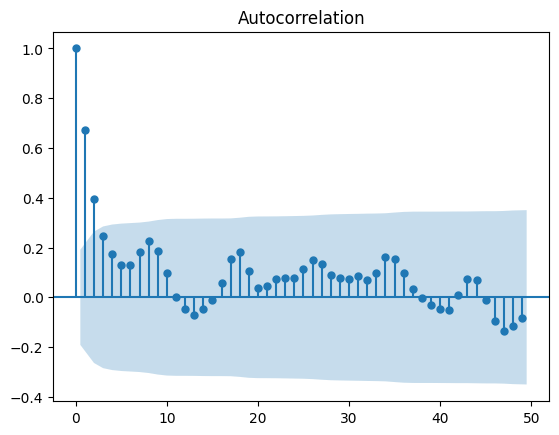

In [ ]:
# автокорреляционная функция (ACF) для недельного
plot_acf(weekly_data['total_amount_net'], lags = np.arange(50), alpha = 0.05)
plt.axis('tight')
plt.show()

По графикам видно, что есть недельная цикличность, есть высокая корреляция с lag_1, lag_7, lag_14 и т.д., но с каждой неделей она уменьшается.

df_day: lag_1, lag_7, lag_14, rolling_mean_7, rolling_mean_14

df_week: lag_1, rolling_mean_12, rolling_mean_24

In [ ]:
# Лаги
daily_data['lag_1'] = daily_data['total_amount_net'].shift(1).fillna(daily_data['total_amount_net'][:3].mean()).ewm(span=2).mean()
daily_data['lag_7'] = daily_data['total_amount_net'].shift(7).fillna(daily_data['total_amount_net'][:7].mean()).ewm(span=5).mean()
daily_data['lag_14'] = daily_data['total_amount_net'].shift(14).fillna(daily_data['total_amount_net'][:14].mean()).ewm(span=10).mean()
weekly_data['lag_1'] = weekly_data['total_amount_net'].shift(1).fillna(weekly_data['total_amount_net'][:3].mean()).ewm(span=2).mean()

In [ ]:
# Скользящее среднее
daily_data['rolling_mean_7'] = daily_data['total_amount_net'].rolling(window=7, min_periods=3).mean()
daily_data['rolling_mean_14'] = daily_data['total_amount_net'].rolling(window=14, min_periods=3).mean()
weekly_data['rolling_mean_12'] = weekly_data['total_amount_net'].rolling(window=12, min_periods=3).mean()
weekly_data['rolling_mean_24'] = weekly_data['total_amount_net'].rolling(window=24, min_periods=3).mean()

# Экспоненциальное сглаживание
daily_data['EMA_7'] = daily_data['total_amount_net'].ewm(span=7, min_periods=1).mean()
daily_data['EMA_14'] = daily_data['total_amount_net'].ewm(span=14, min_periods=1).mean()
weekly_data['EMA_12'] = weekly_data['total_amount_net'].ewm(span=12, min_periods=1).mean()
weekly_data['EMA_24'] = weekly_data['total_amount_net'].ewm(span=24, min_periods=1).mean()

In [ ]:
new_order_daily = ['service_date', 'unique_patients', 'hospital_ammount', 'non_hospital_ammount', 'hospital_unique_patients', 'unique_service_codes', 'high_cost_proportion', 'service_code_hhi', 'mean_ammount', 'total_racords', 'lag_1', 'lag_7', 'lag_14', 'rolling_mean_7', 'rolling_mean_14', 'EMA_7', 'EMA_14' ,'total_amount_net']
daily_data = daily_data[new_order_daily]
daily_data.head()

,service_date,unique_patients,hospital_ammount,non_hospital_ammount,hospital_unique_patients,unique_service_codes,high_cost_proportion,service_code_hhi,mean_ammount,total_racords,lag_1,lag_7,lag_14,rolling_mean_7,rolling_mean_14,EMA_7,EMA_14,total_amount_net
0,2022-01-01,33,0.00,159311.20,0,57,0.212500,0.023125,1991.390000,80,522701.276667,767077.931429,1.298460e+06,NaN,NaN,159311.200000,159311.200000,159311.20
1,2022-01-02,84,26930.00,486975.29,1,158,0.201729,0.012233,1480.995072,347,250158.719167,767077.931429,1.298460e+06,NaN,NaN,361936.394286,349272.319643,513905.29
2,2022-01-03,163,12827.22,882060.12,1,217,0.191104,0.013253,1474.278979,607,432752.498974,767077.931429,1.298460e+06,522701.276667,522701.276667,592401.668108,557699.110102,894887.34
3,2022-01-04,150,28827.86,871642.62,2,219,0.232975,0.010778,1613.746380,558,744693.516667,767077.931429,1.298460e+06,617143.577500,617143.577500,705066.833600,662562.541339,900470.48
4,2022-01-05,176,59126.81,1118811.58,5,267,0.196742,0.010584,1476.113271,798,848973.963196,767077.931429,1.298460e+06,729302.540000,729302.540000,860066.985250,797023.311684,1177938.39


In [ ]:
new_order_weekly = ['service_date', 'unique_patients', 'hospital_ammount', 'non_hospital_ammount', 'hospital_unique_patients', 'unique_service_codes', 'high_cost_proportion', 'service_code_hhi', 'mean_ammount', 'total_racords', 'lag_1', 'rolling_mean_12', 'rolling_mean_24', 'EMA_12', 'EMA_24' ,'total_amount_net']
weekly_data = weekly_data[new_order_weekly]
weekly_data.head()

,service_date,unique_patients,hospital_ammount,non_hospital_ammount,hospital_unique_patients,unique_service_codes,high_cost_proportion,service_code_hhi,mean_ammount,total_racords,lag_1,rolling_mean_12,rolling_mean_24,EMA_12,EMA_24,total_amount_net
0,2022-01-02,111,26930.00,646286.49,1,179,0.203747,0.011600,1576.619415,427,7.135424e+06,NaN,NaN,6.732165e+05,6.732165e+05,673216.49
1,2022-01-09,812,216619.48,6941940.62,7,613,0.227079,0.009136,1604.698521,4461,2.288768e+06,NaN,NaN,4.186111e+06,4.051000e+06,7158560.10
2,2022-01-16,1475,821270.87,12753223.96,25,783,0.244389,0.007689,1702.131013,7975,5.660163e+06,7.135424e+06,7.135424e+06,7.850399e+06,7.493559e+06,13574494.83
3,2022-01-23,1626,737067.73,14238375.52,23,769,0.253580,0.008505,1743.560746,8589,1.100234e+07,9.095429e+06,9.095429e+06,1.009950e+07,9.604052e+06,14975443.25
4,2022-01-30,1604,1084899.85,13769072.15,18,875,0.253576,0.007721,1741.380070,8530,1.366202e+07,1.024714e+07,1.024714e+07,1.139127e+07,1.083600e+07,14853972.00


# Оценим корреляцию и сохраним датасеты

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/Датасеты итоговые/daily.csv')
df.head(2)

,service_date,unique_patients,hospital_ammount,non_hospital_ammount,hospital_unique_patients,unique_service_codes,high_cost_proportion,service_code_hhi,mean_ammount,total_racords,lag_1,lag_7,lag_14,rolling_mean_7,rolling_mean_14,EMA_7,EMA_14,total_amount_net
0,2022-01-01,33,0.0,159311.20,0,57,0.212500,0.023125,1991.390000,80,522701.276667,767077.931429,1.298460e+06,NaN,NaN,159311.200000,159311.200000,159311.20
1,2022-01-02,84,26930.0,486975.29,1,158,0.201729,0.012233,1480.995072,347,250158.719167,767077.931429,1.298460e+06,NaN,NaN,361936.394286,349272.319643,513905.29


In [5]:
df['service_date'] = pd.to_datetime(df['service_date'])
df.set_index('service_date', inplace=True)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

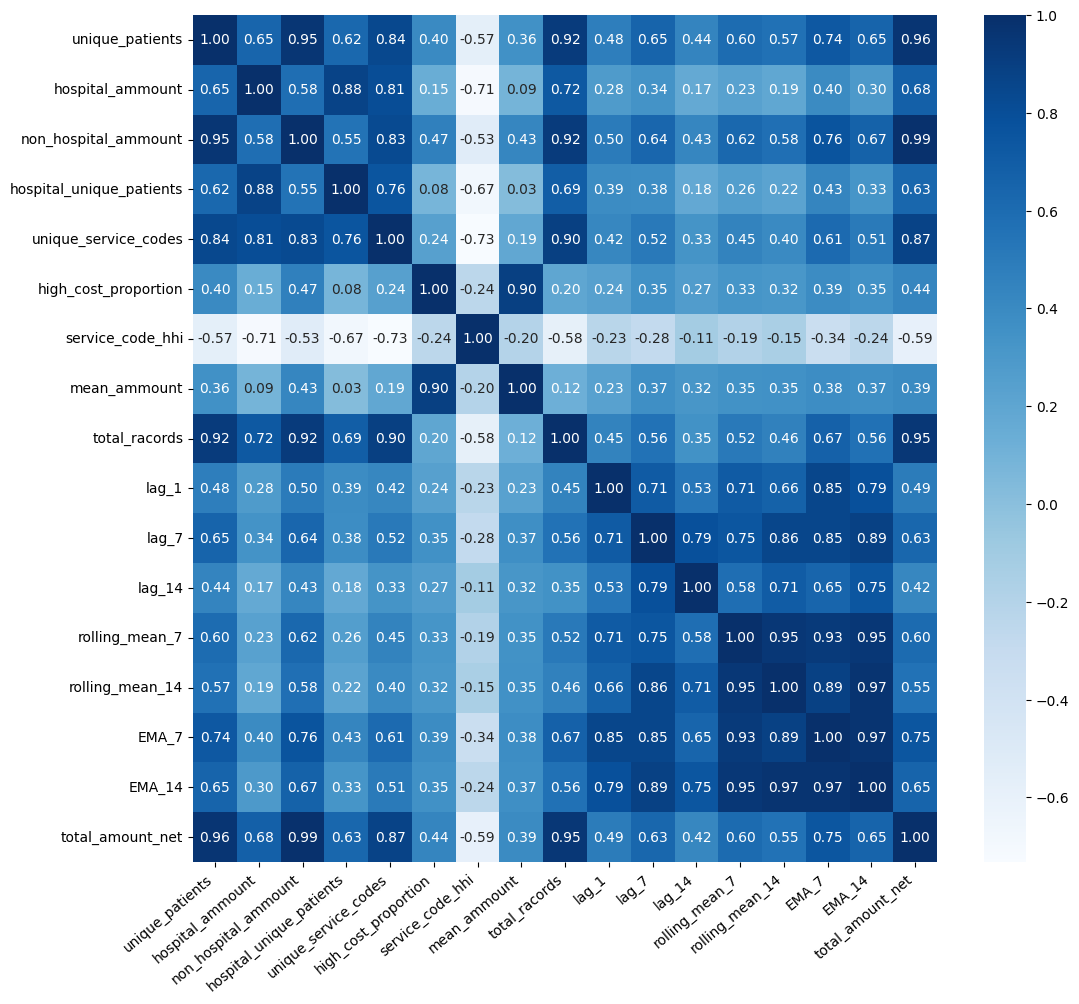

<Figure size 1200x1100 with 0 Axes>

In [7]:
# матрица корреляции
from pylab import rcParams
rcParams['figure.figsize'] =12, 11
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f', cmap='Blues')
plt.xticks(rotation=40,  ha='right')
plt.show()
plt.savefig("output.jpg")

Проще сделаем матрицей

Заметная корреляция всех признаков. Все информативны. Оставляем

In [ ]:
daily_data['service_date'] = pd.to_datetime(daily_data['service_date'])
daily_data.set_index('service_date', inplace=True)
type(daily_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
plot_correlation(daily_data)

,unique_patients,hospital_ammount,non_hospital_ammount,hospital_unique_patients,unique_service_codes,high_cost_proportion,service_code_hhi,mean_ammount,total_racords,lag_1,lag_7,lag_14,rolling_mean_7,rolling_mean_14,EMA_7,EMA_14,total_amount_net
unique_patients,1.000000,0.648291,0.968611,0.645385,0.895541,0.410114,-0.527309,0.336901,0.949910,0.554596,0.621148,0.409735,0.609948,0.553738,0.759327,0.666500,0.973499
hospital_ammount,0.648291,1.000000,0.586478,0.872782,0.777514,0.151794,-0.472039,0.080060,0.712053,0.318133,0.341216,0.207304,0.273445,0.232625,0.418347,0.328677,0.679333
non_hospital_ammount,0.968611,0.586478,1.000000,0.575406,0.884763,0.473066,-0.517177,0.404887,0.950235,0.564910,0.614575,0.399856,0.627464,0.561614,0.775123,0.676358,0.992791
hospital_unique_patients,0.645385,0.872782,0.575406,1.000000,0.746689,0.093441,-0.477266,0.031290,0.694305,0.439676,0.378796,0.216273,0.317902,0.265172,0.475472,0.377836,0.650477
unique_service_codes,0.895541,0.777514,0.884763,0.746689,1.000000,0.276887,-0.631127,0.189792,0.930656,0.511989,0.532382,0.348884,0.511016,0.450180,0.679557,0.580087,0.916656
high_cost_proportion,0.410114,0.151794,0.473066,0.093441,0.276887,1.000000,-0.229874,0.903628,0.237516,0.227725,0.328919,0.233945,0.282881,0.281921,0.359956,0.332513,0.451062
service_code_hhi,-0.527309,-0.472039,-0.517177,-0.477266,-0.631127,-0.229874,1.000000,-0.117308,-0.543327,-0.292847,-0.260800,-0.134529,-0.242773,-0.192843,-0.389112,-0.318935,-0.538417
mean_ammount,0.336901,0.080060,0.404887,0.031290,0.189792,0.903628,-0.117308,1.000000,0.136505,0.216796,0.325697,0.262940,0.307397,0.317186,0.332840,0.323369,0.378675
total_racords,0.949910,0.712053,0.950235,0.694305,0.930656,0.237516,-0.543327,0.136505,1.000000,0.536264,0.559609,0.346332,0.562128,0.490234,0.721884,0.613987,0.966287
lag_1,0.554596,0.318133,0.564910,0.439676,0.511989,0.227725,-0.292847,0.216796,0.536264,1.000000,0.701743,0.500987,0.759782,0.691894,0.877520,0.809570,0.558888


In [ ]:
daily_data.to_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/daily')
weekly_data.to_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/weekly')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Хакатоны/CUP_IT_25/daily')
df.head()

,service_date,unique_patients,hospital_ammount,non_hospital_ammount,hospital_unique_patients,unique_service_codes,high_cost_proportion,service_code_hhi,mean_ammount,total_racords,lag_1,lag_7,lag_14,rolling_mean_7,rolling_mean_14,EMA_7,EMA_14,total_amount_net
0,2022-01-01,33,0.00,159311.20,0,57,0.212500,0.023125,1991.390000,80,522701.276667,767077.931429,1.298460e+06,NaN,NaN,159311.200000,159311.200000,159311.20
1,2022-01-02,84,26930.00,486975.29,1,158,0.201729,0.012233,1480.995072,347,250158.719167,767077.931429,1.298460e+06,NaN,NaN,361936.394286,349272.319643,513905.29
2,2022-01-03,163,12827.22,882060.12,1,217,0.191104,0.013253,1474.278979,607,432752.498974,767077.931429,1.298460e+06,522701.276667,522701.276667,592401.668108,557699.110102,894887.34
3,2022-01-04,150,28827.86,871642.62,2,219,0.232975,0.010778,1613.746380,558,744693.516667,767077.931429,1.298460e+06,617143.577500,617143.577500,705066.833600,662562.541339,900470.48
4,2022-01-05,176,59126.81,1118811.58,5,267,0.196742,0.010584,1476.113271,798,848973.963196,767077.931429,1.298460e+06,729302.540000,729302.540000,860066.985250,797023.311684,1177938.39
